# Feature Engineering HW 4 - Report (Ry2464)


**Objective of this assignment**
1. conduct an exhaustive Exploratory data Analysis on the inpatient dataset, find potentially abusive or fruadulent practices
2. create 10-15 new features and structure your EDA for different leads with sub-sections. 
3. Write a short summary of the features that you built and the insight that they afforded at the end of each sub-section. 

    - Lead: Write about what you are going to do in two to three sentences.
    - Analysis: your EDA
    - Conclusion: What is business insight? How can this feature help prediction?

## Table of Content
1. [data Loading & Set Up](#Section_1)
2. Data Visualization
3. Feature Selection

## 1. df Loading & Set Up <a class="anchor" id="Section_1"></a>

In [64]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import plotly
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [65]:
df = pd.read_csv('inpatientCharges.csv')
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [66]:
df.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
df.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


- **Total discharges**: The number of discharges billed by the provider for inpatient hospital services. When you leave a hospital after treatment, you go through a process called hospital discharge.

- **Covered Charges**: Charges for covered services that your health plan paid for. There may be a limit on covered charges if you receive services from providers outside your plan's network of providers. Covered Person - Any person covered under the plan. Covered Service - A healthcare provider’s service or medical supplies covered by your health plan. Benefits will be given for these services based on your plan.

- **Total Covered Charge Amount** = the sum of all covered charges

- **Average Covered Charges** = Total Covered Charge Amount / Total Discharges

- Payment is the amount a hospital actually receives for providing patient care. This is the actual amount paid to a hospital by consumers, insurers or governments. The sources of payment are: 
    1. Medicare and Medicaid 
    2. Private insurer if any
    3. The Patient

- **Average Total Payments** = Total Payments / Total Discharges

- **Average Medicare Payments** = Medicare Payment Amount / Total Discharges

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   DRG                            163065 non-null  object
 1   Provider_Id                    163065 non-null  int64 
 2   Provider_Name                  163065 non-null  object
 3   Provider_StreetAddress         163065 non-null  object
 4   Provider_City                  163065 non-null  object
 5   Provider_State                 163065 non-null  object
 6   Provider_Zipcode               163065 non-null  int64 
 7   Hospital_referral_region_desp  163065 non-null  object
 8   Total_Discharges               163065 non-null  int64 
 9   Average_Covered_Charges        163065 non-null  object
 10  Average_Total_Payments         163065 non-null  object
 11  Average_Medicare_Payment       163065 non-null  object
dtypes: int64(3), object(9)
memory usage: 14.9+ M

Using the info() we can see that there is no null value in the dfset, but Average Covered Charges, Average Total Payments, and Average Medicare Payments are not recorded in numerical form. To begin cleaning the data set, I will update the column type 


In [68]:
df['DRG'] = df['DRG'].astype('category')
df['Provider_State'] = df['Provider_State'].astype('category')
df['Provider_City'] = df['Provider_City'].astype('category')
df['Provider_Id'] = df['Provider_Id'].astype('category')
df['Provider_Zipcode'] = df['Provider_Zipcode'].astype('category')

df['Average_Covered_Charges'] = (df['Average_Covered_Charges']
                              .str.replace(r'[^-+\d.]', '').astype(float))

df['Average_Total_Payments'] = (df['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '').astype(float))
df['Average_Medicare_Payment'] = (df['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '').astype(float))
df['Medicare_Per']=df['Average_Medicare_Payment']/df['Average_Total_Payments'] # percentage covered by medicare

After cleaning the dataset, the column type and summary of numerical column are the following

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  category
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Covered_Charges        163065 non-null  float64 
 10  Average_Total_Payments         163065 non-null  float64 
 11  Average_Medicare_Payment       163065 non-null  float64 
 12  Medicare_Per    

From the info(), we can ee there is no null value in the dataset, as such we would not need to fill the Null value.

In [70]:
df.describe()

,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payment,Medicare_Per
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,42.776304,36133.954224,9707.473804,8494.490964,0.846545
std,51.104042,35065.365931,7664.642598,7309.467261,0.087911
min,11.000000,2459.400000,2673.000000,1148.900000,0.043155
25%,17.000000,15947.160000,5234.500000,4192.350000,0.796634
50%,27.000000,25245.820000,7214.100000,6158.460000,0.860189
75%,49.000000,43232.590000,11286.400000,10056.880000,0.913504
max,3383.000000,929118.900000,156158.180000,154620.810000,1.000000


From the decribe function, we see that mean>median (50%) for all four columns, and we observe a wide range between max and 75% comparing to min and 25%, which from this alone, it is already exhibiting right-skewness. 

In [71]:
"""plt.clf()
top_states_by_payments = df.groupby(['Provider_State'])['Average_Total_Payments'].median().reset_index().sort_values('Average_Total_Payments', ascending=False).head(15)
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x='Average_Total_Payments', y='Provider_State', data=top_states_by_payments)

# Set the title and labels
plt.title('Top 15 States by Median Average Total Payments')
plt.xlabel('Median Average Total Payments')
plt.ylabel('Provider State')"""

"plt.clf()\ntop_states_by_payments = df.groupby(['Provider_State'])['Average_Total_Payments'].median().reset_index().sort_values('Average_Total_Payments', ascending=False).head(15)\nplt.figure(figsize=(12, 8))  # Set the figure size\nsns.barplot(x='Average_Total_Payments', y='Provider_State', data=top_states_by_payments)\n\n# Set the title and labels\nplt.title('Top 15 States by Median Average Total Payments')\nplt.xlabel('Median Average Total Payments')\nplt.ylabel('Provider State')"

## Visualizing the Dataset

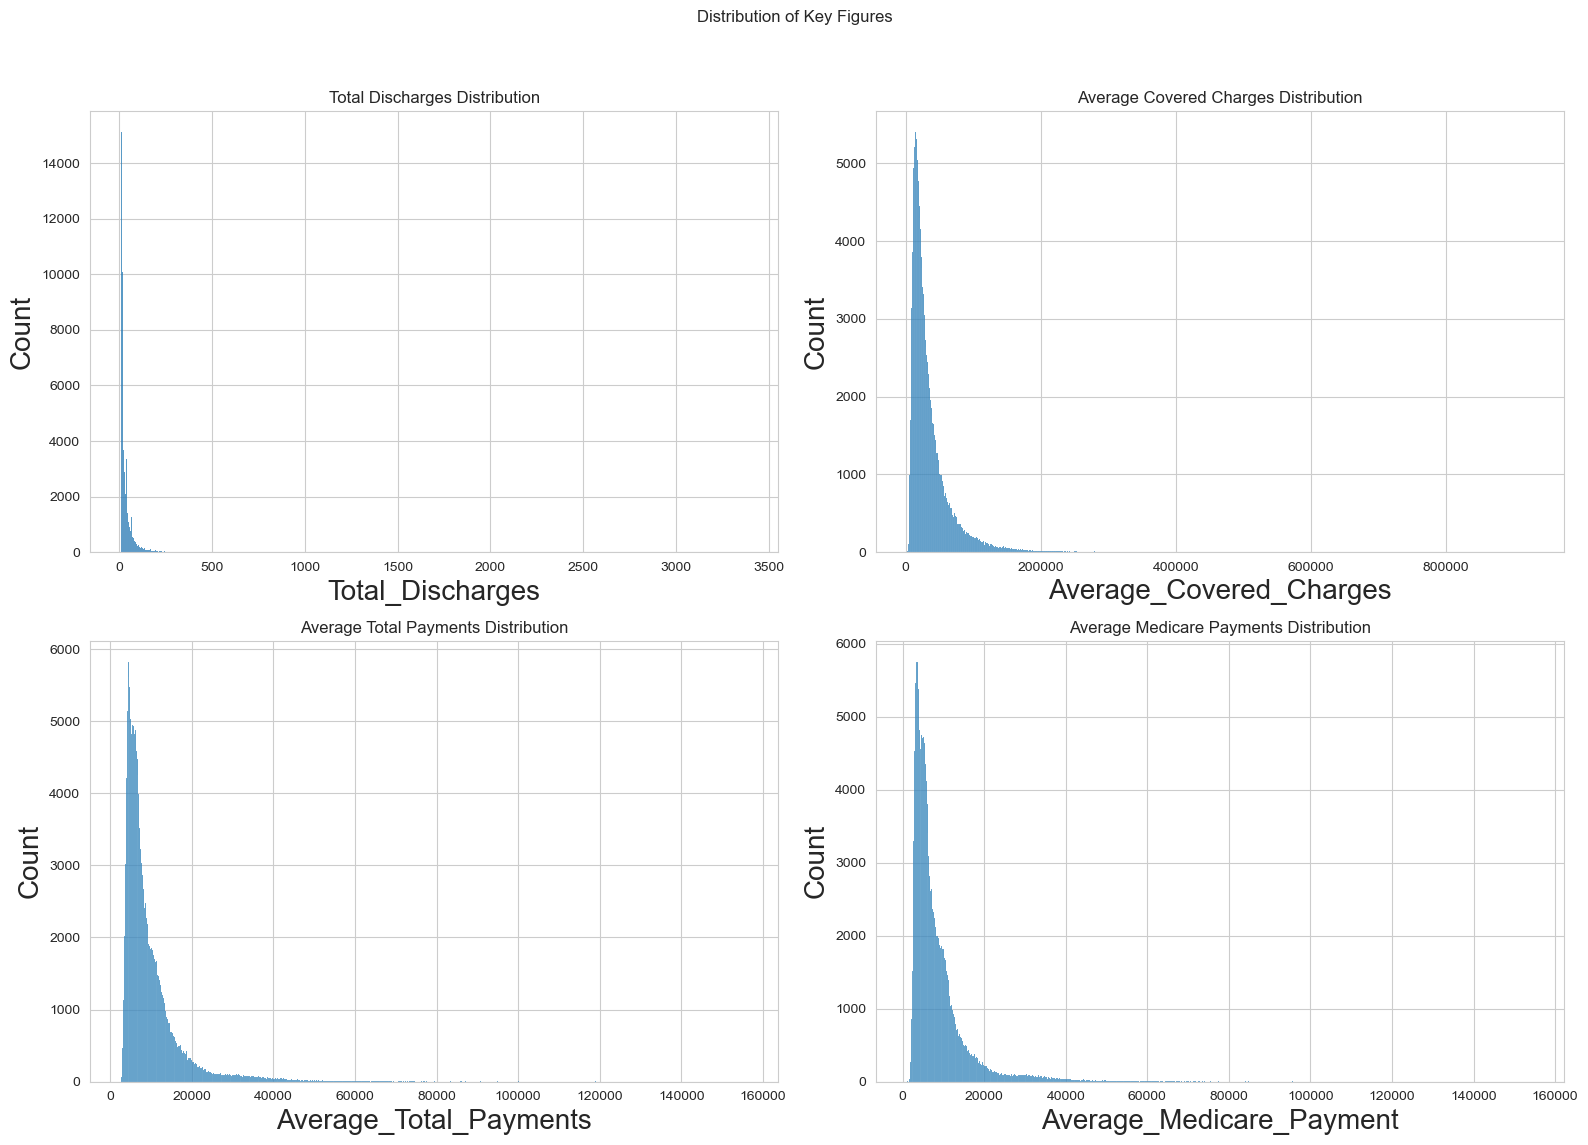

In [72]:
sns.set_style("whitegrid")
# Histograms for numeric figures
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Key Figures')

sns.histplot(df['Total_Discharges'], ax=axes[0, 0])
axes[0, 0].set_title('Total Discharges Distribution')

sns.histplot(df['Average_Covered_Charges'], ax=axes[0, 1])
axes[0, 1].set_title('Average Covered Charges Distribution')

sns.histplot(df['Average_Total_Payments'], ax=axes[1, 0])
axes[1, 0].set_title('Average Total Payments Distribution')

sns.histplot(df['Average_Medicare_Payment'], ax=axes[1, 1])
axes[1, 1].set_title('Average Medicare Payments Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


Looking at the distibution of Total_Discharges, Average_Covered_Charges, Average_Total_Payments, and Average_Medicare_Payment, it is obvious all the columns are heavily **right skewed**. As such, I will be using median instead of the mean as benchmark in later analysis, to mitigate the effect from extreme value in the dataset

In [73]:
'''
from plotly.subplots import make_subplots
fig = px.histogram(df, x='Total_Discharges', title='Total Discharges Distribution')
fig = px.histogram(df, x='Average_Covered_Charges', title='Average Covered Charges Distribution')
fig = px.histogram(df, x='Average_Total_Payments', title='Average Total Payments Distribution')
fig = px.histogram(df, x='Average_Medicare_Payment', title='Average Medicare Payments Distribution')


fig = make_subplots(rows=2, cols=2, subplot_titles=('Total Discharges Distribution', 'Average Covered Charges Distribution', 'Average Total Payments Distribution', 'Average Medicare Payments Distribution'))

# Add each graph to the subplot
fig.add_trace(go.Histogram(x=df['Total_Discharges']), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Average_Covered_Charges']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['Average_Total_Payments']), row=2, col=1)
fig.add_trace(go.Histogram(x=df['Average_Medicare_Payment']), row=2, col=2)


fig.update_layout(showlegend=False, title_text="Distribution of Key Columns")
fig.update_layout(height=800, width=1000)
fig.show()
'''

'\nfrom plotly.subplots import make_subplots\nfig = px.histogram(df, x=\'Total_Discharges\', title=\'Total Discharges Distribution\')\nfig = px.histogram(df, x=\'Average_Covered_Charges\', title=\'Average Covered Charges Distribution\')\nfig = px.histogram(df, x=\'Average_Total_Payments\', title=\'Average Total Payments Distribution\')\nfig = px.histogram(df, x=\'Average_Medicare_Payment\', title=\'Average Medicare Payments Distribution\')\n\n\nfig = make_subplots(rows=2, cols=2, subplot_titles=(\'Total Discharges Distribution\', \'Average Covered Charges Distribution\', \'Average Total Payments Distribution\', \'Average Medicare Payments Distribution\'))\n\n# Add each graph to the subplot\nfig.add_trace(go.Histogram(x=df[\'Total_Discharges\']), row=1, col=1)\nfig.add_trace(go.Histogram(x=df[\'Average_Covered_Charges\']), row=1, col=2)\nfig.add_trace(go.Histogram(x=df[\'Average_Total_Payments\']), row=2, col=1)\nfig.add_trace(go.Histogram(x=df[\'Average_Medicare_Payment\']), row=2, col

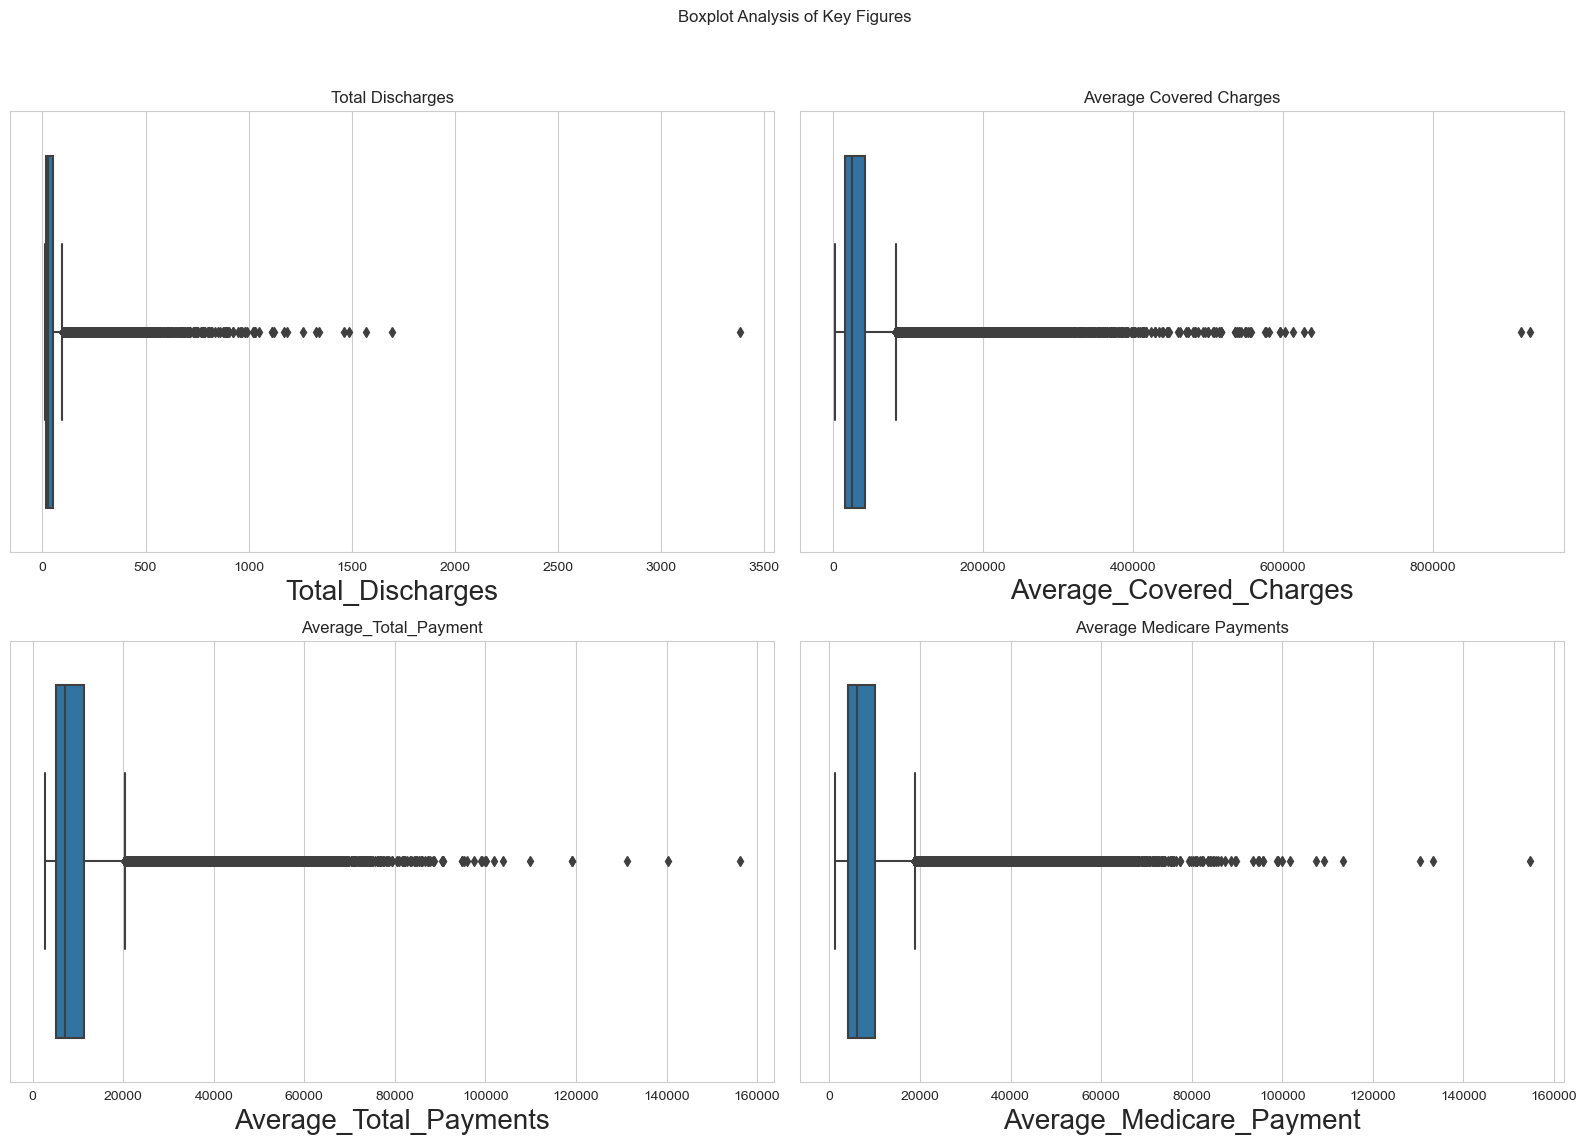

In [74]:
# Boxplots for key figures
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Boxplot Analysis of Key Figures')

sns.boxplot(x=df['Total_Discharges'], ax=axes[0, 0])
axes[0, 0].set_title('Total Discharges')

sns.boxplot(x=df['Average_Covered_Charges'], ax=axes[0, 1])
axes[0, 1].set_title('Average Covered Charges')

sns.boxplot(x=df['Average_Total_Payments'], ax=axes[1, 0])
axes[1, 0].set_title('Average_Total_Payment')

sns.boxplot(x=df['Average_Medicare_Payment'], ax=axes[1, 1])
axes[1, 1].set_title('Average Medicare Payments')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


Boxplot shows the distribution of the cost. When an observation is on the right doesn't mean the provider is abusing or conducting fruad, we have further investigate it in context of DRG and geographical location. 

Text(0.5, 1.0, 'Number of Provider by state')

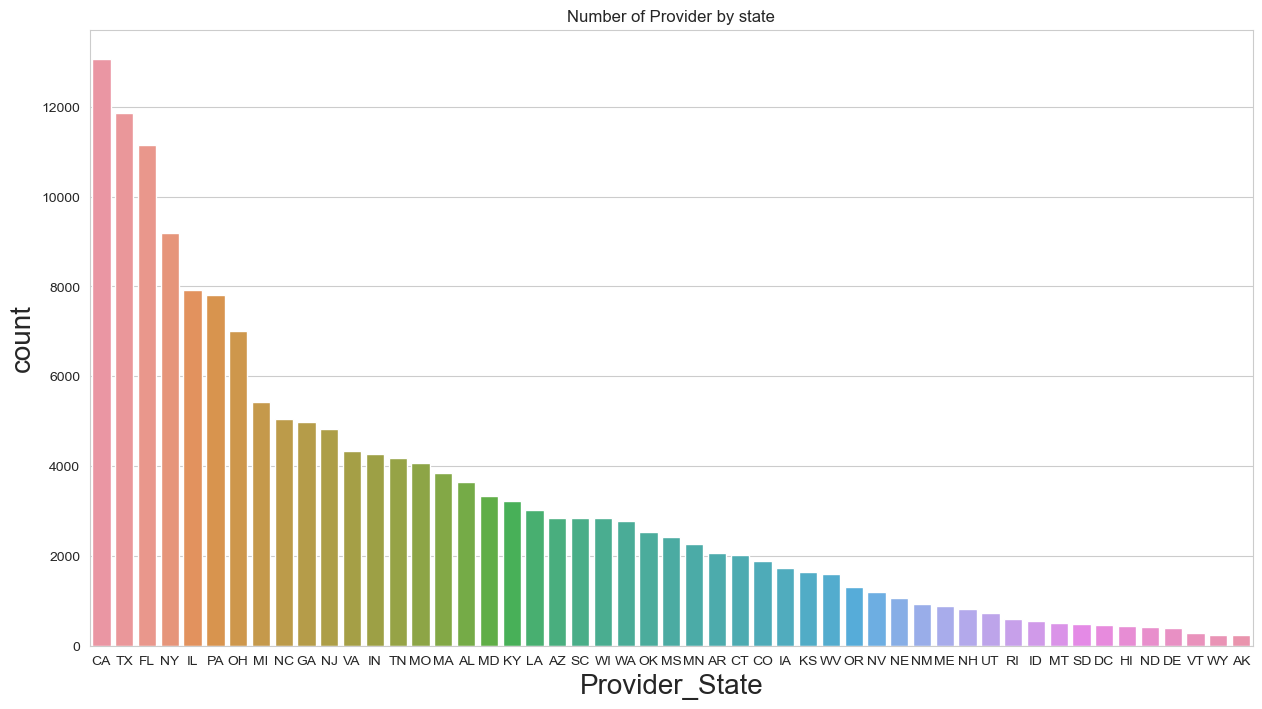

In [75]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Provider_State',data=df,order=df['Provider_State'].value_counts().index)
plt.title('Number of Provider by state')

Looking at distribution of Provider, we can observe that CA, TX, FL, NY and IL hasthe most providers. Smaller state such as AK, WY, VY and DE has significantly less providers

Text(0.5, 1.0, 'Top 20 City by Number of Providers')

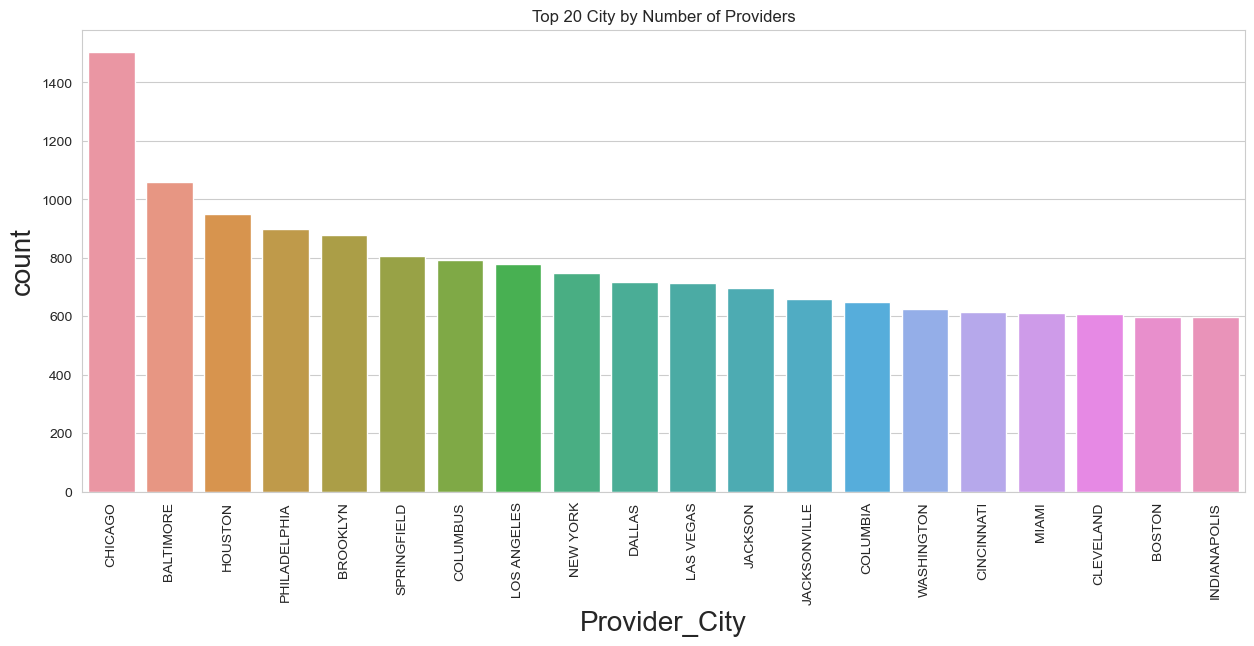

In [76]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Provider_City',data=df,order=df['Provider_City'].value_counts().head(20).index)
plt.xticks(rotation=90) 
plt.title('Top 20 City by Number of Providers')

Looking at the city each provided is located at, its is surprising that chicago and baltimore has the most provider. While large metropolitan like NYC, Brooklyn and LA are ranked not on top on this graph. This showed that provider are spread out across different cities in NY, FL and CA, while in MD more provided are centered at Baltimore

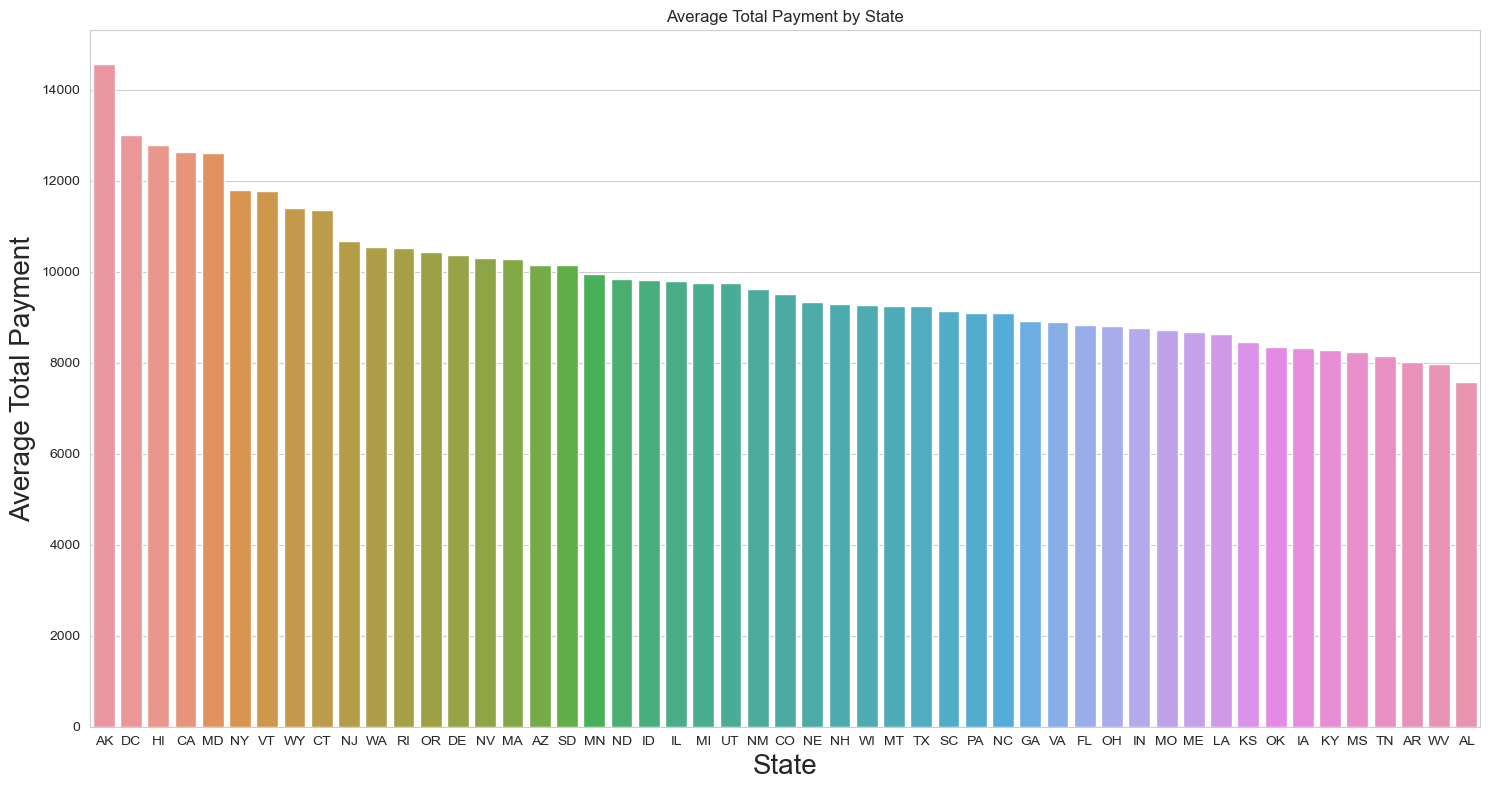

In [77]:
state_payments = df.groupby('Provider_State')['Average_Total_Payments'].mean().reset_index()
state_payments.rename(columns={'Average_Total_Payments': 'Mean_Total_Payments'}, inplace=True)

# Sort the states by the average total payments in descending order
state_payments = state_payments.sort_values('Mean_Total_Payments', ascending=False)

sorted_states = state_payments['Provider_State'].tolist()

plt.figure(figsize=(15, 8))
sns.barplot(
    x='Provider_State', 
    y='Mean_Total_Payments', 
    data=state_payments, 
    order=sorted_states,  # Order the bars according to the sorted states
)

plt.title('Average Total Payment by State')
plt.xlabel('State')
plt.ylabel('Average Total Payment')

plt.tight_layout()  # Adjust the layout to fit everything nicely
plt.show()


Text(0.5, 1.0, 'Top 20 DRG Claim')

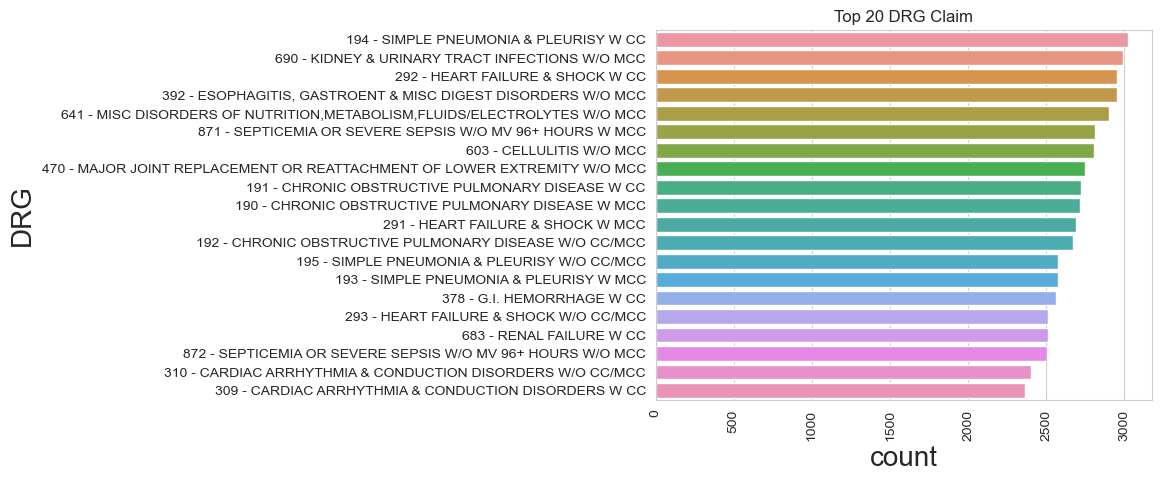

In [78]:
plt.xticks(rotation=90) 
sns.countplot(y='DRG',data=df,order=df['DRG'].value_counts().head(20).index)
plt.title('Top 20 DRG Claim')

<Figure size 1000x800 with 0 Axes>

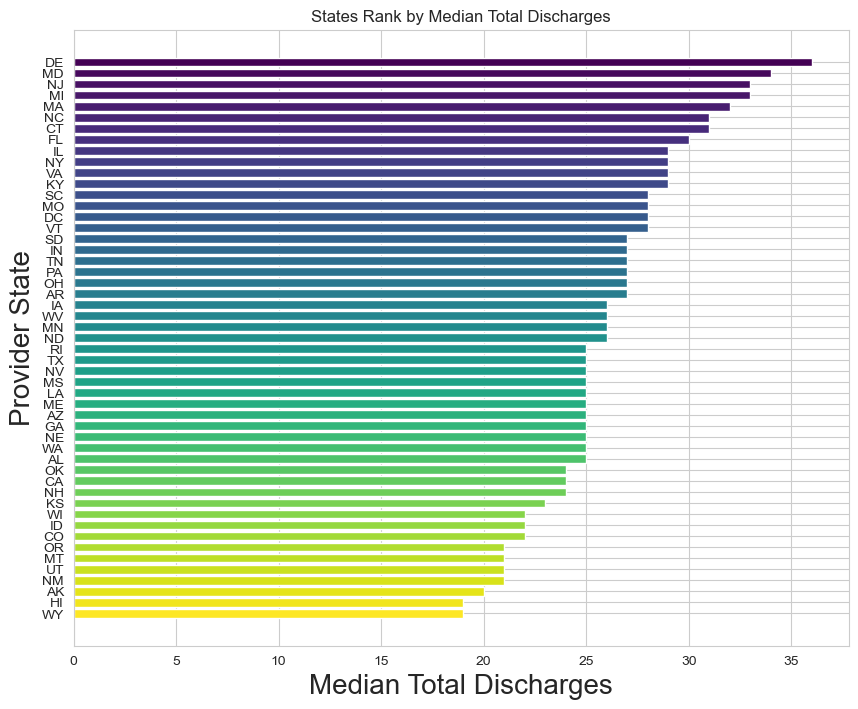

In [79]:
plt.figure(figsize=(10, 8))
state_median_payments = df.groupby('Provider_State')['Total_Discharges'].median().reset_index()
top_median_payments = state_median_payments.sort_values('Total_Discharges', ascending=False)

cmap = plt.cm.get_cmap('viridis', len(top_median_payments))  # Get a color map
colors = [cmap(i) for i in range(len(top_median_payments))]  # Generate colors for each bar

plt.figure(figsize=(10,8))
plt.barh(top_median_payments['Provider_State'], top_median_payments['Total_Discharges'], color=colors)
plt.xlabel('Median Total Discharges')
plt.ylabel('Provider State')
plt.title('States Rank by Median Total Discharges')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

State such as AK, HI and DC have the lowest number of in-state provider, however they have the highest median total payment, 

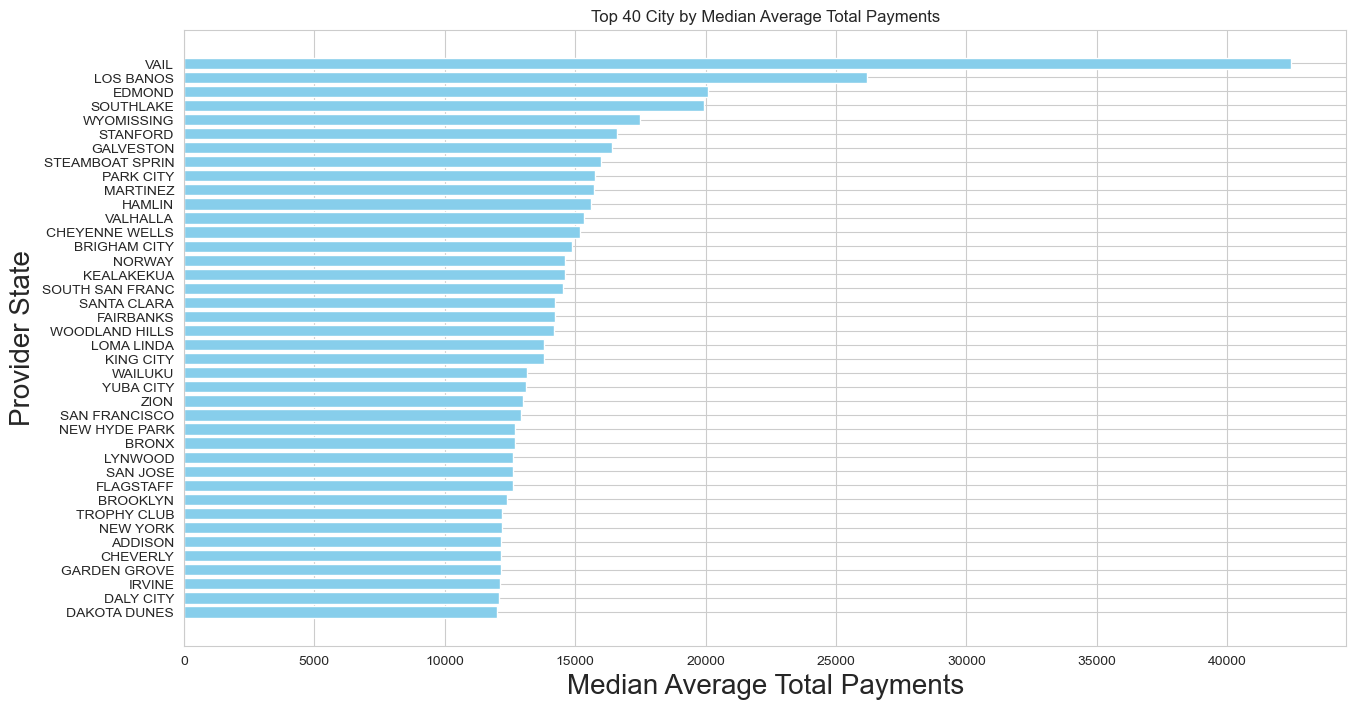

In [80]:
city_median_payments = df.groupby('Provider_City')['Average_Total_Payments'].median().reset_index()
top_city_median_payments = city_median_payments.sort_values('Average_Total_Payments', ascending=False).head(40)

# Plotting with matplotlib
plt.figure(figsize=(15, 8))
plt.barh(top_city_median_payments['Provider_City'], top_city_median_payments['Average_Total_Payments'], color='skyblue')
plt.xlabel('Median Average Total Payments')
plt.ylabel('Provider State')
plt.title('Top 40 City by Median Average Total Payments')
plt.gca().invert_yaxis()  
plt.show()

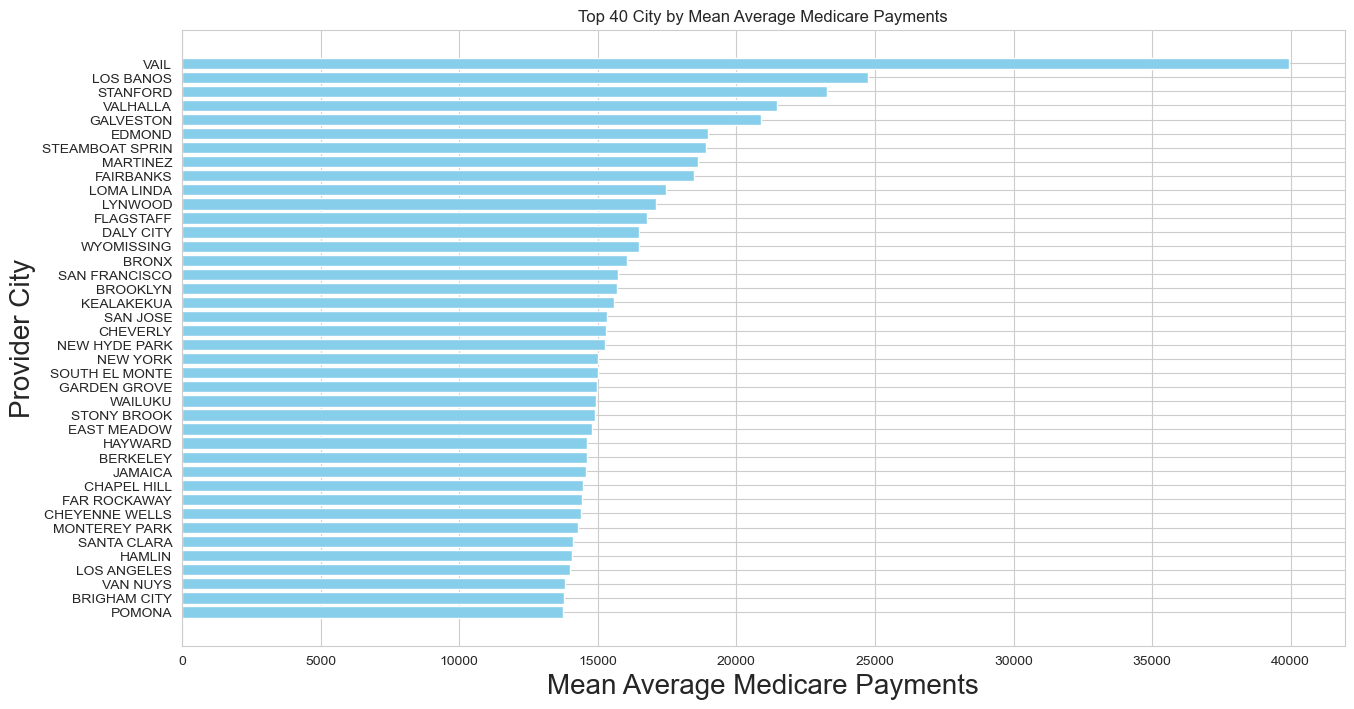

In [81]:
city_mean_medicare_payments = df.groupby('Provider_City')['Average_Medicare_Payment'].mean().reset_index()
top_city_mean_medicare_payments = city_mean_medicare_payments.sort_values('Average_Medicare_Payment', ascending=False).head(40)

# Plotting with matplotlib
plt.figure(figsize=(15, 8))
plt.barh(top_city_mean_medicare_payments['Provider_City'], top_city_mean_medicare_payments['Average_Medicare_Payment'], color='skyblue')
plt.xlabel('Mean Average Medicare Payments')
plt.ylabel('Provider City')
plt.title('Top 40 City by Mean Average Medicare Payments')
plt.gca().invert_yaxis()  
plt.show()

Looking at the top 40 cities in term of number of providers, mot of them are not in the top 20 cities by number of provider list. Only New york and Brooklyn are on the list. Vail which exhibit highest Mean Average Total payment, is a small town know for its ski resort, which the sport injury from skiing might be a drive. More importantly, this graph emphasize how smaller cities are more sensitive to a couple of extreme case. Therefore, I will not be comparing provider within its city. As there are great variance in size between different city

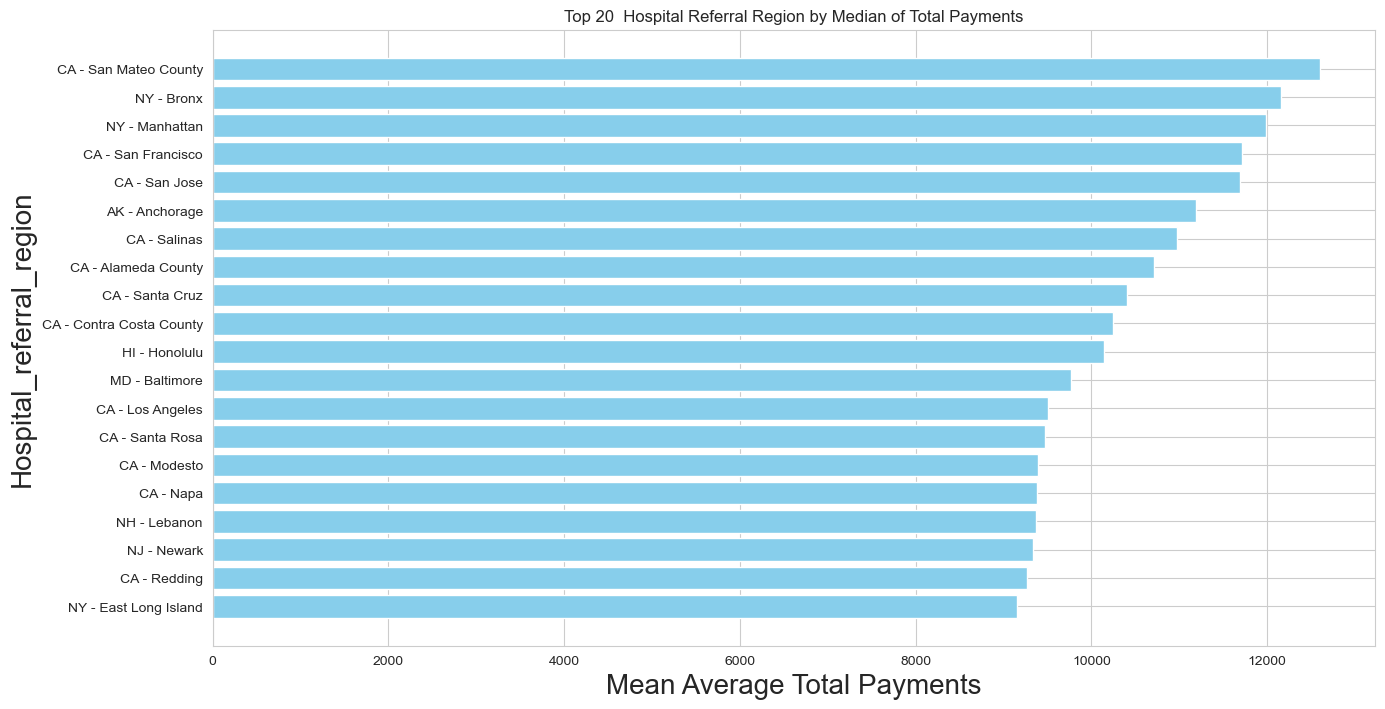

In [82]:

region_median_medicare_payments = df.groupby('Hospital_referral_region_desp')['Average_Total_Payments'].median().reset_index()
top_region_median_medicare_payments = region_median_medicare_payments.sort_values('Average_Total_Payments', ascending=False).head(20)

# Plotting with matplotlib
plt.figure(figsize=(15, 8))
plt.barh(top_region_median_medicare_payments['Hospital_referral_region_desp'], top_region_median_medicare_payments['Average_Total_Payments'], color='skyblue')
plt.xlabel('Mean Average Total Payments')
plt.ylabel('Hospital_referral_region')
plt.title('Top 20  Hospital Referral Region by Median of Total Payments')
plt.gca().invert_yaxis()  
plt.show()

If we examine the cost across different hospital referral region, we now see that region with highest median total payment are mainly located in a states with most number of providers (CA, NY) or in one of the city (Baltimore). Looking at the hospital referral region gives us more focused geographical insight regarding the medical expense relative to the region. In this project, we will be looking more thoroughly regarding how provider is charging in aspect such as total payment, covered payment, and medicare

In [83]:
mean_payments_by_drg = df.groupby('DRG')['Average_Total_Payments'].median().reset_index().sort_values('Average_Total_Payments', ascending=False).head(20)


In [84]:
"""drg_atc=df.groupby('DRG')['Average_Total_Payment'].median().reset_index()
drg_atc.columns = ['DRG','mean(Average_Total_Payment)']
drg_atc=drg_atc.head(20)

# fig = px.bar(drg_acc, x='DRG', y= 'mean(Average_Covered_Charges)', width=1000, height=400)
sns.set_theme(style="whitegrid")
sns.barplot(x='DRG', y= 'mean(Average_Total_Payment)', data=drg_acc)
plt.title('Top Twenty Agencies by Transaction Count')
plt.show()"""

'drg_atc=df.groupby(\'DRG\')[\'Average_Total_Payment\'].median().reset_index()\ndrg_atc.columns = [\'DRG\',\'mean(Average_Total_Payment)\']\ndrg_atc=drg_atc.head(20)\n\n# fig = px.bar(drg_acc, x=\'DRG\', y= \'mean(Average_Covered_Charges)\', width=1000, height=400)\nsns.set_theme(style="whitegrid")\nsns.barplot(x=\'DRG\', y= \'mean(Average_Total_Payment)\', data=drg_acc)\nplt.title(\'Top Twenty Agencies by Transaction Count\')\nplt.show()'

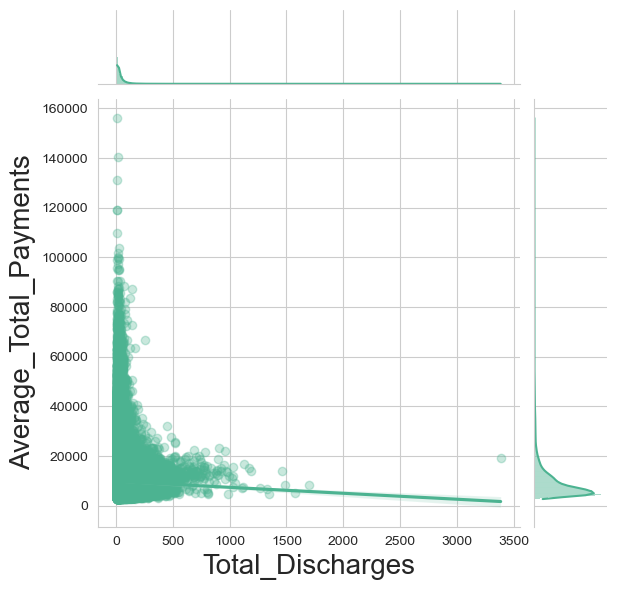

In [85]:
g = sns.jointplot(y = "Average_Total_Payments", x = "Total_Discharges"
                , data=df,kind="reg", color="#4CB391", scatter_kws={'alpha':0.3})

## Feature Selection

### Group 1: Provider Relative to its State & DRG
DRG and Geographical Location both have a significant impact on the charges and resource. Therefore I will first begin comparing record relative to their geographical location (state) and DRG. 
- Provider's total payment relative to State and DRG median
- Provider's total discharge relative to State and DRG median
- Provider's medicare payment relative to State and DRG median

#### Feature 1 - Ratio of Average Total Payment to DRG Median Within a State

- **Lead:** This ratio will compare the average total payment for a given provider's DRG to the median total payment for that DRG within the same state. Geographical location could have significant impact on the charge, therefore by comparing claims within the state normalize thei impact of geographical locations. Also, different DRG requires different treatment and has different cost, so total payment is only comparable to those in the same DRG. Statistically mean is sensitive to extreme values. We have seen in previous EDA, Average Total Payment is a heavily right-skewed distribution. By using median as a reference point helps mitigate the impact of outliers and provides a robust benchmark for comparison. This approach provides **a measure of how a specific provider's charges compare to a robust central tendency (median) within the same operational context.**

In [86]:

# Median Total Payment for each DRG within each State
median_payments = df.groupby(['DRG', 'Provider_State'])['Average_Total_Payments'].median().reset_index()
median_payments.rename(columns={'Average_Total_Payments': 'Median_Total_Payments'}, inplace=True)

# Merge back
df = df.merge(median_payments, on=['DRG', 'Provider_State'])

# calculate Ratio
df['TC_to_DRG_ST_Median_Ratio'] = df['Average_Total_Payments'] / df['Median_Total_Payments']
df['TC_to_DRG_ST_Median_Ratio'].describe()
df = df.drop('Median_Total_Payments', axis=1)


In [87]:
median_payments = df.groupby(['DRG', 'Provider_State'])['Average_Total_Payments'].median().reset_index()
median_payments.sort_values('Average_Total_Payments', ascending= False).head(10)

,DRG,Provider_State,Average_Total_Payments
2652,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,AK,68006.425
4648,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,DC,62113.595
4692,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,AK,61300.630
4641,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,AK,57238.680
4726,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,NY,55198.170
4652,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,HI,54386.120
1071,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,AK,54385.475
4699,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,DC,52959.250
4738,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,VT,52761.330
4722,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,NH,52306.000


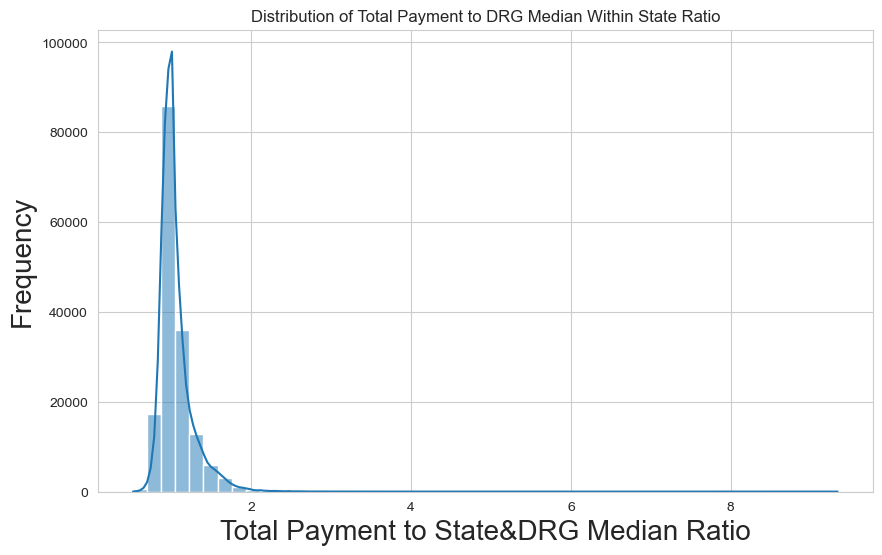

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TC_to_DRG_ST_Median_Ratio'], bins=50, kde=True)
plt.title('Distribution of Total Payment to DRG Median Within State Ratio')

plt.xlabel('Total Payment to State&DRG Median Ratio')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the distribution of the payment-to-median ratio is **highly right-skewed**. The peak is at 1, mean is at 1.050746 and IQR is 0.93 and 1.12 respectively. This indicates that the majority of providers charge close to the state median payment for their respective DRGs. However, the long tail to the right suggests that there are providers with payment ratios significantly above 1, which means that some providers receive payments much higher than the median for their state and DRG.

In [89]:
state_counts = df['Provider_State'].value_counts().rename_axis('Provider_State').reset_index(name='Counts')
order = state_counts.sort_values('Counts', ascending=False)['Provider_State']

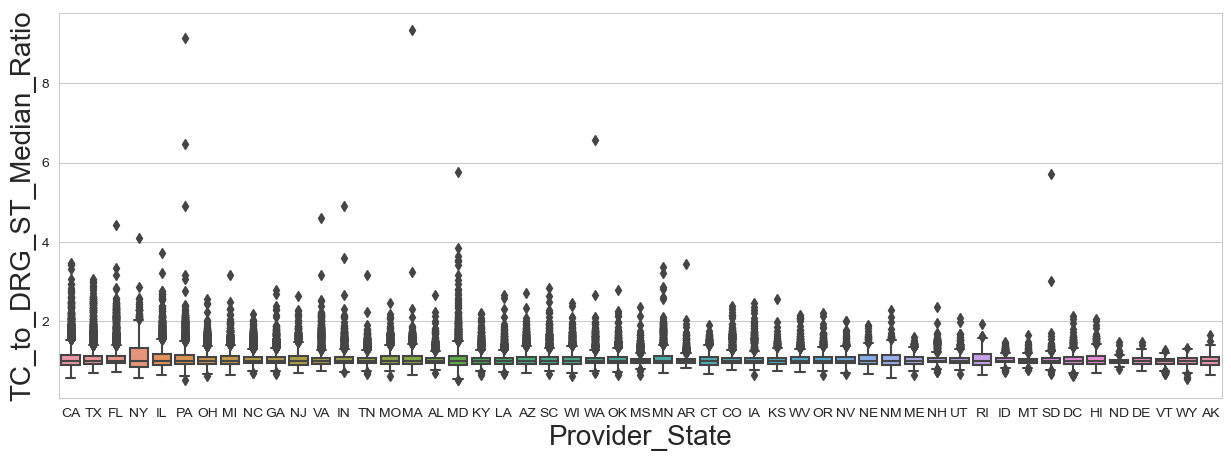

In [90]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Provider_State'],y=df['TC_to_DRG_ST_Median_Ratio'], order = order)
plt.rcParams["axes.labelsize"] = 20


The boxplot across different states displays variability in the total-payment-to-DRG-median ratio within each state ordered by the number of providers. From the graph, the median (50% quantile) of each state is around 1, indicating consistency with the state median payment. However, the IQR range are clearly wider for some states such as NY,RI, NM & NJ. We also noticed a large amount of outlier within the states of Maryland, and we also see a couple of extreme values from PA and MA. From the boxplot we noticed there are some abnormal observations on the top of the graph, indicating abnormality

**Conclusion:** A high ratio may suggest fraudulent billing practices or abuse, such as charging for more expensive services than were provided within the context of their state and DRG. This could signify potential of inefficiencies, overcharging, or fraud.

#### Feature 2: Ratio of Provider's Total Discharge Relative to DRG and State Median
- **Lead** This analysis examines each provider's total discharges in the context of the median discharge figures for their specific DRG within their state. By assessing how individual providers' discharge rates compare to localized medians, we can identify patterns that deviate from the norm which might indicate operational anomalies. If we see a abnormally high dischargs ratio comparing to its peers, a provider can be providing excessive treatment 

In [91]:

# Median Total Payment for each DRG within each State
median_discharges = df.groupby(['DRG', 'Provider_State'])['Total_Discharges'].median().reset_index()
median_discharges.rename(columns={'Total_Discharges': 'Median_Total_Discharges'}, inplace=True)

# Merge back
df = df.merge(median_discharges, on=['DRG', 'Provider_State'])

# calculate Ratio
df['Discharge_to_DRG_ST_Median_Ratio'] = df['Total_Discharges'] / df['Median_Total_Discharges']
df['Discharge_to_DRG_ST_Median_Ratio'].describe()


count    163065.000000
mean          1.260075
std           0.987288
min           0.047210
25%           0.687500
50%           1.000000
75%           1.526316
max          71.409091
Name: Discharge_to_DRG_ST_Median_Ratio, dtype: float64

In [92]:
df = df.drop('Median_Total_Discharges', axis=1) # drop the benchmark
df.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payment,Medicare_Per,TC_to_DRG_ST_Median_Ratio,Discharge_to_DRG_ST_Median_Ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,0.824568,1.021015,3.137931
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,0.859896,1.022841,0.482759
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,0.819472,0.960522,0.827586
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,0.762181,0.957449,0.862069
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,0.857398,1.000000,0.620690


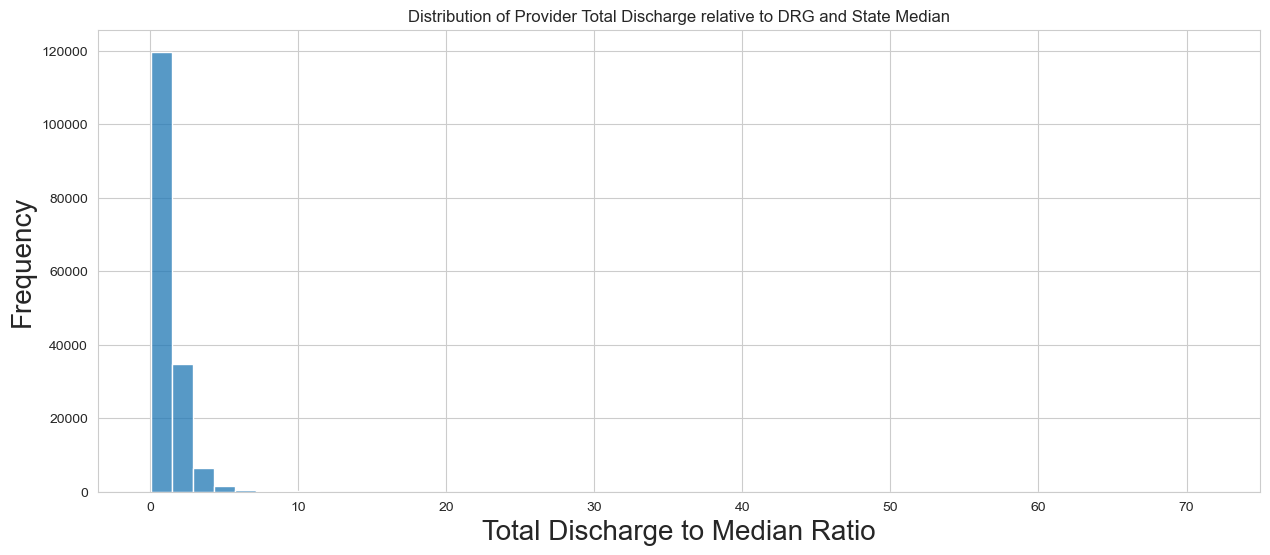

In [93]:
plt.figure(figsize=(15, 6))
sns.histplot(df['Discharge_to_DRG_ST_Median_Ratio'],bins=50)
plt.title('Distribution of Provider Total Discharge relative to DRG and State Median')

plt.xlabel('Total Discharge to Median Ratio')
plt.ylabel('Frequency')
plt.show()

The histogram displaysa concentration of data points near a ratio of one, which indicates provide's discharges is aligning with the state and DRG norms. However, the long tail to the right highlights the presence of extreme values, where some providers have discharge rates significantly higher than the median.

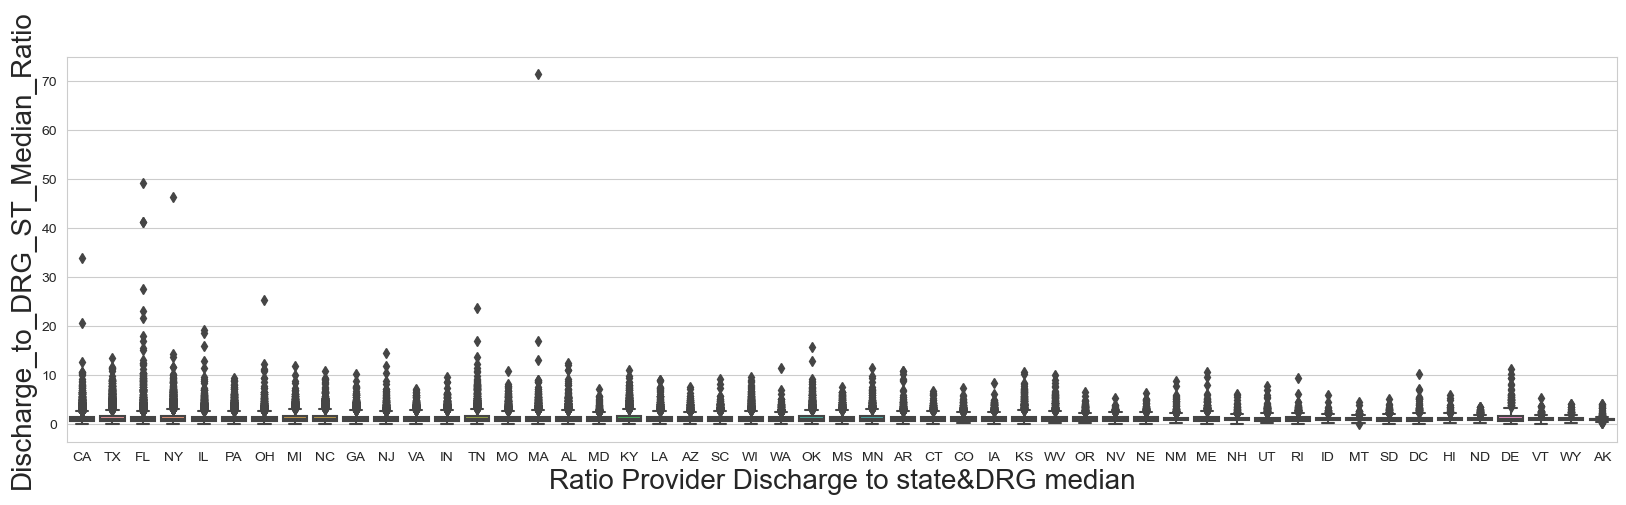

In [94]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Provider_State'],y=df['Discharge_to_DRG_ST_Median_Ratio'], order = order)
plt.xlabel('Ratio Provider Discharge to state&DRG median')
plt.rcParams["axes.labelsize"] = 20


Most points cluster near the bottom, indicating ratios close to the median, but several outliers stand out significantly above the rest. As we can see, FL, MA and NY has noticable outliers that is on the top of the graph, which is worth investigating

**Business Insight**: The concentration of providers around the ratio of one suggests that most adhere to the average discharge practices for their DRG and state. However, the presence of outliers — especially those with very high ratios — could indicate practices such as premature discharges or an exceptionally high volume of procedures, which may warrant further investigation for potential overutilization or fraud.

In [95]:
'''median_covered_payments = df.groupby(['DRG', 'Provider_State'])['Average_Covered_Payment'].median().reset_index()
median_covered_payments.rename(columns={'Average_covered_Payment': 'Median_covered_Payment'}, inplace=True)

df = df.merge(median_covered_payments, on=['DRG', 'Provider_State'])
df['Medicare_Payment_Ratio'] = df['Average_Medicare_Payment'] / df['Median_Medicare_Payments']
df = df.drop('Median_Medicare_Payments', axis=1)

df['Medicare_Payment_Ratio'].describe()
'''

"median_covered_payments = df.groupby(['DRG', 'Provider_State'])['Average_Covered_Payment'].median().reset_index()\nmedian_covered_payments.rename(columns={'Average_covered_Payment': 'Median_covered_Payment'}, inplace=True)\n\ndf = df.merge(median_covered_payments, on=['DRG', 'Provider_State'])\ndf['Medicare_Payment_Ratio'] = df['Average_Medicare_Payment'] / df['Median_Medicare_Payments']\ndf = df.drop('Median_Medicare_Payments', axis=1)\n\ndf['Medicare_Payment_Ratio'].describe()\n"

#### Feature 3: Ratio of Provider's medicare payment relative to State and DRG median
- **Lead:** This ratio differs from total payments or covered charges in that it specifically reflects reimbursements from Medicare, offering a focused lens on the amount of governmental reimbursement a provider recieves, thereby finding potential irregularities.

In [96]:
median_medicare_payments = df.groupby(['DRG', 'Provider_State'])['Average_Medicare_Payment'].median().reset_index()
median_medicare_payments.rename(columns={'Average_Medicare_Payment': 'Median_Medicare_Payments'}, inplace=True)

df = df.merge(median_medicare_payments, on=['DRG', 'Provider_State'])
df['Medicare_Payment_Ratio'] = df['Average_Medicare_Payment'] / df['Median_Medicare_Payments']
df = df.drop('Median_Medicare_Payments', axis=1)

df['Medicare_Payment_Ratio'].describe()


count    163065.000000
mean          1.055484
std           0.234139
min           0.367836
25%           0.916191
50%           1.000000
75%           1.121178
max           6.030981
Name: Medicare_Payment_Ratio, dtype: float64

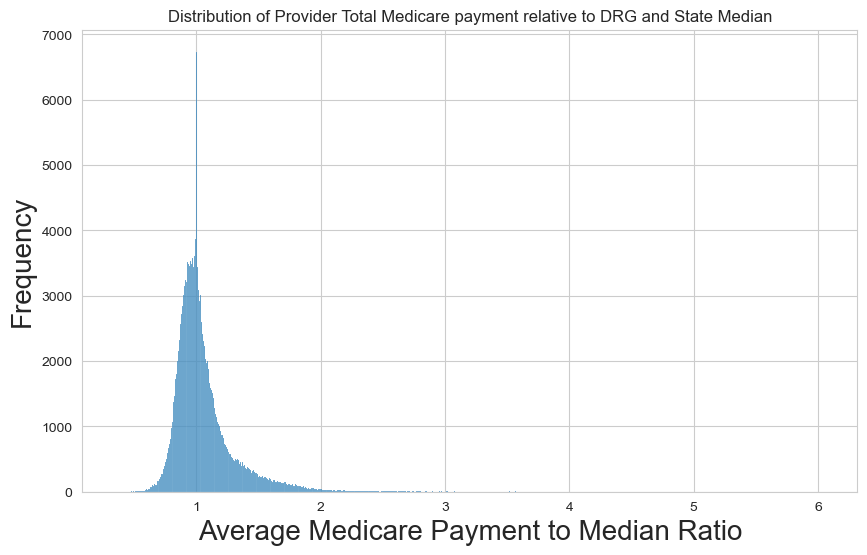

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Medicare_Payment_Ratio'])
plt.title('Distribution of Provider Total Medicare payment relative to DRG and State Median')

plt.xlabel('Average Medicare Payment to Median Ratio')
plt.ylabel('Frequency')
plt.show()

The histogram shows slight right skewness. More observation are between 0.5 and 2, we notice some extreme values

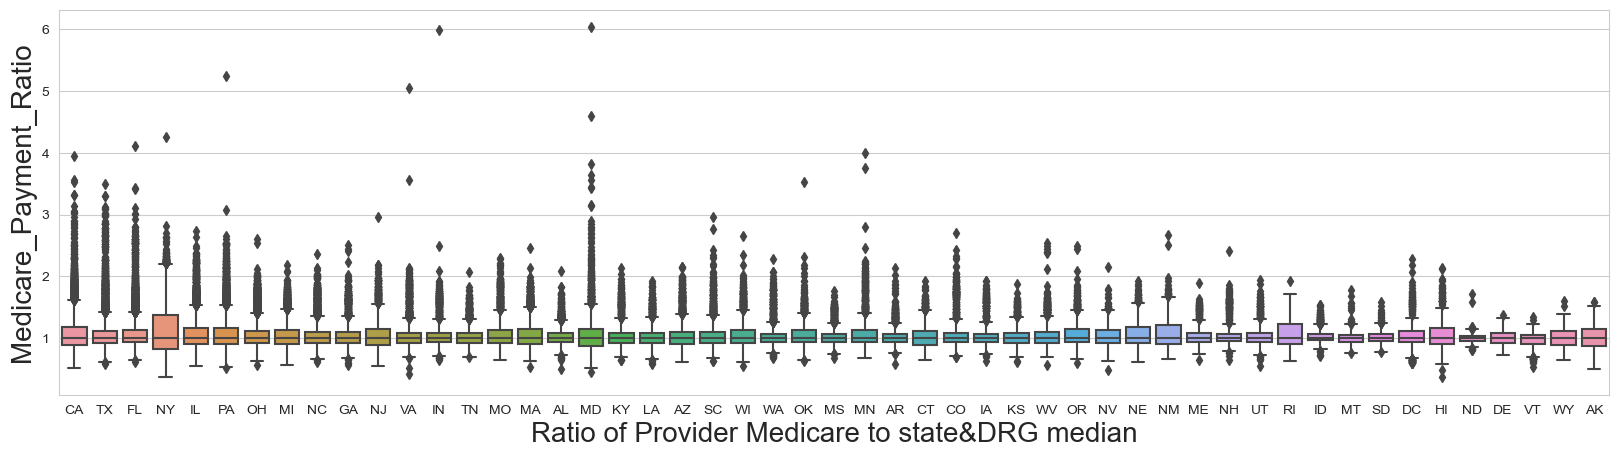

In [98]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Provider_State'],y=df['Medicare_Payment_Ratio'], order = order)
plt.xlabel('Ratio of Provider Medicare to state&DRG median')
plt.rcParams["axes.labelsize"] = 20


**Analysis**: The distribution of providers around a ratio of one indicates that the majority conform to the normative medicare coverage amount for DRG and state. We noticed some high ratios, which in later model we can bin it into {low, medium, high} by its quantile for detecting abuse and fraud

In [99]:
# Median Total Payment for each DRG within each State
st_drg_medi_payments = df.groupby(['DRG', 'Provider_State'])['Average_Medicare_Payment'].median().reset_index()
st_drg_medi_payments.rename(columns={'Average_Medicare_Payment': 'Median_medicare_Payment'}, inplace=True)
# Merge back
df = df.merge(st_drg_medi_payments, on=['DRG', 'Provider_State'])


In [100]:
# calculate Ratio
df['MC_to_DRG_ST_Median_Ratio'] = df['Average_Medicare_Payment'] / df['Median_medicare_Payment']
df = df.drop('Median_medicare_Payment', axis=1)
df['MC_to_DRG_ST_Median_Ratio'].describe()

count    163065.000000
mean          1.055484
std           0.234139
min           0.367836
25%           0.916191
50%           1.000000
75%           1.121178
max           6.030981
Name: MC_to_DRG_ST_Median_Ratio, dtype: float64

### Group 2: Comparison Within Hospital Referral Region
Hospital Referral Region offers more insight to how an provider charging relative to its geographical location. States like NY, CA and FL, the cost can differ greatly within state. If we look at it from Referral Region, we are able to comparing it other provider of similar characterstic. I will adopt the same feature that I've adopted for states, to zoom in for a more thorough investigation
1. Ratio of Provider Average Total Payment, comparing to Hospital_referral_region_desp Median
2. Ratio of Provider Total Discharge, comparing to Hospital_referral_region_desp Median
3. Ratio of Provider Average Medicare Payment, comparing to Hospital_referral_region_desp Median


#### Feature 1:  Ratio of Provider Total Discharge, comparing to Hospital_referral_region_desp Median

**lead**:By quantifying how each region's payment compares to the median DRG payment, it becomes possible to provider with unusually high payment ratios. Such a metric is particularly useful for detecting outliers that significantly deviate from the typical payment range, flagging them for further analysis to uncover potential causes of such discrepancies.

In [101]:

# Median Total Payment for each DRG within each State
median_payments = df.groupby(['DRG', 'Hospital_referral_region_desp'])['Average_Total_Payments'].median().reset_index()
median_payments.rename(columns={'Average_Total_Payments': 'Median_Total_Payments'}, inplace=True)

# Merge back
df = df.merge(median_payments, on=['DRG', 'Hospital_referral_region_desp'])

# calculate Ratio
df['TC_to_DRG_reg_Median_Ratio'] = df['Average_Total_Payments'] / df['Median_Total_Payments']
df['TC_to_DRG_reg_Median_Ratio'].describe()
df = df.drop('Median_Total_Payments', axis=1)


In [102]:
median_payments = df.groupby(['DRG', 'Hospital_referral_region_desp'])['Average_Total_Payments'].median().reset_index()
median_payments.sort_values('Average_Total_Payments', ascending= False).head(10)

,DRG,Hospital_referral_region_desp,Average_Total_Payments
6460,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,CA - San Mateo County,114783.025
28186,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,CA - San Mateo County,89483.050
28180,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,CA - Salinas,83457.840
6454,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,CA - Salinas,83294.280
28171,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,CA - Contra Costa County,81991.150
28449,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,WI - Madison,74399.820
27874,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,CA - Salinas,73622.015
28351,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,NY - Bronx,70852.055
15931,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,CA - Contra Costa County,70803.760
28191,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,CA - Ventura,69015.335


In [103]:
df.sort_values('TC_to_DRG_reg_Median_Ratio', ascending= False).head(10)

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payment,Medicare_Per,TC_to_DRG_ST_Median_Ratio,Discharge_to_DRG_ST_Median_Ratio,Medicare_Payment_Ratio,MC_to_DRG_ST_Median_Ratio,TC_to_DRG_reg_Median_Ratio
38990,203 - BRONCHITIS & ASTHMA W/O CC/MCC,220008,STURDY MEMORIAL HOSPITAL,211 PARK STREET,ATTLEBORO,MA,2703,RI - Providence,11,7965.18,41482.09,1790.18,0.043155,9.338775,0.647059,0.532763,0.532763,8.618473
21804,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,390096,ST JOSEPH MEDICAL CENTER,2500 BERNVILLE ROAD,READING,PA,19605,PA - Reading,143,24542.94,72797.93,7718.09,0.106021,9.150067,5.107143,1.098660,1.098660,7.883990
50587,249 - PERC CARDIOVASC PROC W NON-DRUG-ELUTING ...,500051,OVERLAKE HOSPITAL MEDICAL CENTER,1035-116TH AVE NE,BELLEVUE,WA,98004,WA - Seattle,23,44499.00,84499.26,8500.60,0.100600,6.575751,1.045455,0.787705,0.787705,6.736009
49226,247 - PERC CARDIOVASC PROC W DRUG-ELUTING STEN...,430095,AVERA HEART HOSPITAL OF SOUTH DAKOTA LLC,4500 W 69TH ST,SIOUX FALLS,SD,57108,SD - Sioux Falls,121,43844.23,83484.14,9316.11,0.111591,5.720311,1.052174,0.848840,0.848840,6.728023
162445,948 - SIGNS & SYMPTOMS W/O MCC,390312,CANCER TREATMENT CENTERS OF AMERICA,1331 EAST WYOMING AVENUE,PHILADELPHIA,PA,19124,PA - Philadelphia,24,83945.95,28968.20,8894.20,0.307033,6.471822,1.043478,2.520703,2.520703,5.989806
37802,202 - BRONCHITIS & ASTHMA W CC/MCC,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,17,43980.52,41458.47,37236.00,0.898152,5.751227,0.680000,6.030981,6.030981,5.591943
111175,469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,390256,MILTON S HERSHEY MEDICAL CENTER,500 UNIVERSITY DRIVE,HERSHEY,PA,17033,PA - Harrisburg,15,227821.80,100018.33,99114.86,0.990967,4.913382,1.000000,5.238203,5.238203,5.022834
109602,460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,150166,PINNACLE HOSPITAL,9301 CONNECTICUT DR,CROWN POINT,IN,46307,IN - Gary,14,225729.14,131187.35,130466.57,0.994506,4.909864,0.388889,5.990165,5.990165,4.860387
118865,552 - MEDICAL BACK PROBLEMS W/O MCC,100122,NORTH OKALOOSA MEDICAL CENTER,151 REDSTONE AVE SE,CRESTVIEW,FL,32539,FL - Pensacola,12,44986.25,21330.75,3622.08,0.169806,4.432087,0.400000,0.970539,0.970539,4.631079
87082,315 - OTHER CIRCULATORY SYSTEM DIAGNOSES W CC,490009,UNIVERSITY OF VIRGINIA MEDICAL CENTER,JEFFERSON PARK AVE,CHARLOTTESVILLE,VA,22908,VA - Charlottesville,18,94036.33,26704.11,26015.88,0.974228,4.593319,0.923077,5.041940,5.041940,4.422858


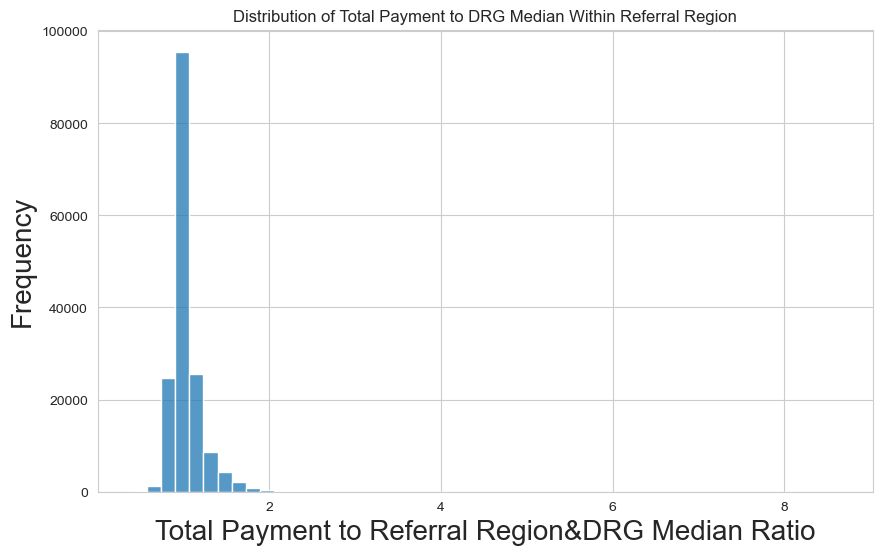

In [104]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TC_to_DRG_reg_Median_Ratio'], bins=50)
plt.title('Distribution of Total Payment to DRG Median Within Referral Region')

plt.xlabel('Total Payment to Referral Region&DRG Median Ratio')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**
we can see that the Total Payment to DRG Median Ratio for most referral regions is tightly clustered around a value less than 1, with a sharp drop-off as the ratio increases. The data shows that there areregions with a payment ratio significantly above the median. The histogram suggest a general consistency in payments relative to the DRG median across most regions, with a few exceptions.This could indicate that while there is some variation in payments, there isn't a wide disparity across different regions. However, those regions represented by the tail of the distribution may warrant further investigation to understand why their payments are relatively higher within their region.

#### Feature 2: Ratio of Provider Total Discharge, comparing to Hospital_referral_region_desp Median
This feature identify disparities in discharge rates across different healthcare providers. This ratio can pinpoint providers whose discharge rates are significantly above the regional median, thereby highlighting potential areas for inefficiency or resource abuse.

In [105]:
# Median discharges for each DRG within each State
median_discharges = df.groupby(['DRG', 'Hospital_referral_region_desp'])['Total_Discharges'].median().reset_index()
median_discharges.rename(columns={'Total_Discharges': 'Median_Total_Discharge'}, inplace=True)

# Merge back
df = df.merge(median_discharges, on=['DRG', 'Hospital_referral_region_desp'])

# calculate Ratio
df['TC_to_DRG_reg_disc_Ratio'] = df['Total_Discharges'] / df['Median_Total_Discharge']
df = df.drop('Median_Total_Discharge', axis=1)
df['TC_to_DRG_reg_disc_Ratio'].describe()

count    163065.000000
mean          1.224052
std           0.958837
min           0.018868
25%           0.733333
50%           1.000000
75%           1.387755
max          73.069767
Name: TC_to_DRG_reg_disc_Ratio, dtype: float64

The descriptive statistics reveal that the Ratio of Provider Total Discharge to the Hospital Referral Region Description Median has a mean of approximately 1.22, indicating that, on average, providers discharge slightly more patients than the median for their respective regions.

In [106]:
df.sort_values('TC_to_DRG_reg_disc_Ratio', ascending= False).head(10)

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payment,Medicare_Per,TC_to_DRG_ST_Median_Ratio,Discharge_to_DRG_ST_Median_Ratio,Medicare_Payment_Ratio,MC_to_DRG_ST_Median_Ratio,TC_to_DRG_reg_Median_Ratio,TC_to_DRG_reg_disc_Ratio
158477,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,220062,ADCARE HOSPITAL OF WORCESTER INC,107 LINCOLN STREET,WORCESTER,MA,1605,MA - Worcester,1571,4227.46,4967.56,4284.52,0.862500,1.020657,71.409091,1.076123,1.076123,1.015292,73.069767
158212,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,50752,BROTMAN MEDICAL CENTER,3828 DELMAS TERRACE,CULVER CITY,CA,90231,CA - Los Angeles,510,19917.41,4986.28,4488.87,0.900244,0.929453,34.000000,0.989516,0.989516,0.947672,37.777778
159115,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,360247,"WOODS AT PARKSIDE,THE",349 OLDE RIDENOUR ROAD,COLUMBUS,OH,43230,OH - Columbus,431,5384.68,3913.14,3258.09,0.832602,0.946154,25.352941,0.979061,0.979061,0.946154,30.785714
113301,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,NY,10021,NY - Manhattan,3383,53113.58,19023.70,14880.39,0.782203,1.235385,46.342466,1.144661,1.144661,0.822754,30.071111
153942,885 - PSYCHOSES,100001,SHANDS JACKSONVILLE MEDICAL CENTER,655 W 8TH ST,JACKSONVILLE,FL,32209,FL - Jacksonville,622,13975.74,8935.71,8083.53,0.904632,1.553322,23.037037,1.778813,1.778813,1.561442,27.043478
153951,885 - PSYCHOSES,100052,WINTER HAVEN HOSPITAL,200 AVE F NE,WINTER HAVEN,FL,33881,FL - Orlando,419,18323.71,5194.94,4364.35,0.840116,0.903052,15.518519,0.960392,0.960392,0.939653,23.277778
157999,885 - PSYCHOSES,360025,FIRELANDS REGIONAL MEDICAL CENTER,1111 HAYES AVENUE,SANDUSKY,OH,44870,OH - Cleveland,322,17183.94,5732.83,4776.03,0.833102,1.027836,2.628571,1.020350,1.020350,1.186563,21.466667
111756,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,50290,SAINT JOHN'S HEALTH CENTER,2121 SANTA MONICA BLVD,SANTA MONICA,CA,90404,CA - Los Angeles,922,50614.20,13837.66,11548.05,0.834538,0.808889,10.720930,0.763502,0.763502,0.807952,21.441860
155145,885 - PSYCHOSES,140217,PROVENA - SAINT JOSEPH HOSPITAL,77 N AIRLITE STREET,ELGIN,IL,60123,IL - Elgin,247,28280.24,5480.08,4537.19,0.827942,0.872061,3.106918,0.862741,0.862741,0.970900,20.583333
49600,249 - PERC CARDIOVASC PROC W NON-DRUG-ELUTING ...,40134,ARKANSAS HEART HOSPITAL,1701 S SHACKLEFORD ROAD,LITTLE ROCK,AR,72211,AR - Little Rock,409,36024.38,9393.08,7853.62,0.836107,0.917845,10.225000,0.910485,0.910485,0.892770,19.476190


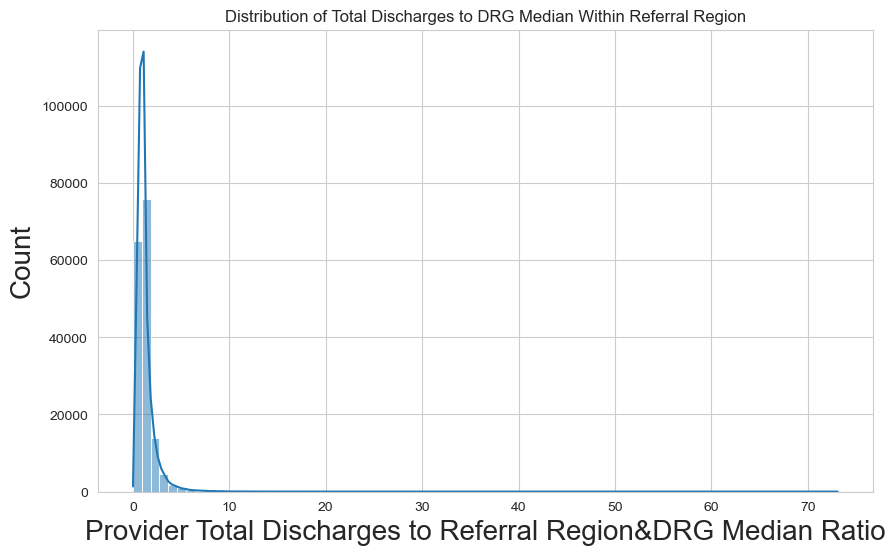

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TC_to_DRG_reg_disc_Ratio'],bins=80,kde=True)
plt.title('Distribution of Total Discharges to DRG Median Within Referral Region')

plt.xlabel('Provider Total Discharges to Referral Region&DRG Median Ratio')
plt.show()

**Conclusion**: The histogram and descriptive statistics illustrate the variability in discharge ratios among healthcare providers. While the majority discharge patients at rates close to the regional median, outliers with exceptionally high ratios indicate potential areas for further investigation. Providers with ratios substantially above the median may warrant scrutiny to understand the factors driving their higher discharge rates

#### Feature 3: Ratio of Provider Average Medicare Payment, comparing to Hospital_referral_region_desp Median
**Lead:** This feature offers valuable insights into government covered payment practices across healthcare providers. By quantifying how each provider's average Medicare payment compares to the median for their respective referral region, this feature facilitates the identification of outliers with significantly higher reimbursement ratios.

In [108]:
# Median discharges for each DRG within each State
median_payments = df.groupby(['DRG', 'Hospital_referral_region_desp'])['Average_Medicare_Payment'].median().reset_index()
median_payments.rename(columns={'Average_Medicare_Payment': 'Median_Payment'}, inplace=True)

# Merge back
df = df.merge(median_payments, on=['DRG', 'Hospital_referral_region_desp'])


df['TC_to_DRG_reg_medi_Ratio'] = df['Average_Medicare_Payment'] / df['Median_Payment']
df = df.drop('Median_Payment', axis=1)

In [109]:
df['TC_to_DRG_reg_medi_Ratio'].describe()

count    163065.000000
mean          1.038494
std           0.196388
min           0.331728
25%           0.935187
50%           1.000000
75%           1.082952
max           5.733904
Name: TC_to_DRG_reg_medi_Ratio, dtype: float64

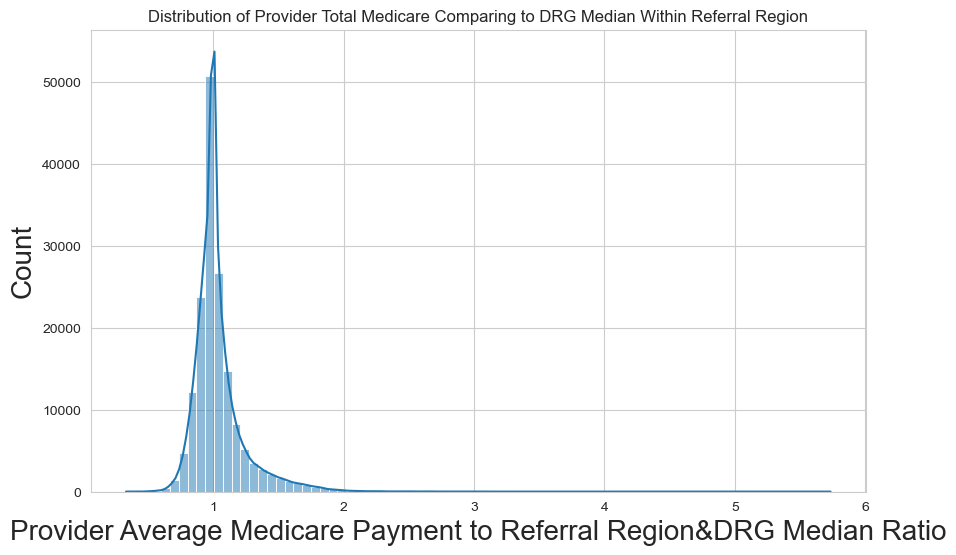

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TC_to_DRG_reg_medi_Ratio'],bins=80, kde=True)
plt.title('Distribution of Provider Total Medicare Comparing to DRG Median Within Referral Region')

plt.xlabel('Provider Average Medicare Payment to Referral Region&DRG Median Ratio')
plt.show()

**Conclusion:** Examining the histogram, we see it is roughly uniformed. THere are is a slight skewness in the right, and observation the summary statstics, we can see that there is aren't many extreme values in this ratio. Nonetheless, this feature provides valuable insight into how providers are reimbursed through the Medicare channel, shedding light on whether a provider is effectively managing reimbursement within their respective referral region.

### Group 3: General Feature
1. Providers Discharge  vs. Total Discharge Median by DRG
2. Providers Ratio of Total Discharge and Average Total Payment
3. Efficency (total payment vs. covered charge)

#### Feature 1: Provider DRG Discharge and DRG Discharge Median
- **Lead**: This feature compares individual provider discharge volumes for specific DRG codes with the median discharge volumes for those DRGs across all providers. Total discharges are arguably less sensitive to geographical location than payments are. In smaller states or regions, comparisons made solely relative to the state or region might be misleading, as each observation carries more weight. When there are only a few records for a state or region, it may be more informative to compare the total DRG discharges to the national median. This comparative approach can reveal operational deviations and potential inefficiencies or anomalies in patient throughput

In [111]:
national_drg_medians = df.groupby('DRG')['Total_Discharges'].median().reset_index(name='National_DRG_Median')
df = df.merge(national_drg_medians, on='DRG')

# Calculate the ratio of the provider's discharge volume to the national DRG median
df['Discharge_to_National_Median_Ratio'] = df['Total_Discharges'] / df['National_DRG_Median']
df = df.drop('National_DRG_Median', axis=1) # drop the benchmark



count    163065.000000
mean          1.288741
std           1.017942
min           0.105769
25%           0.666667
50%           1.000000
75%           1.583333
max          74.809524
Name: Discharge_to_National_Median_Ratio, dtype: float64

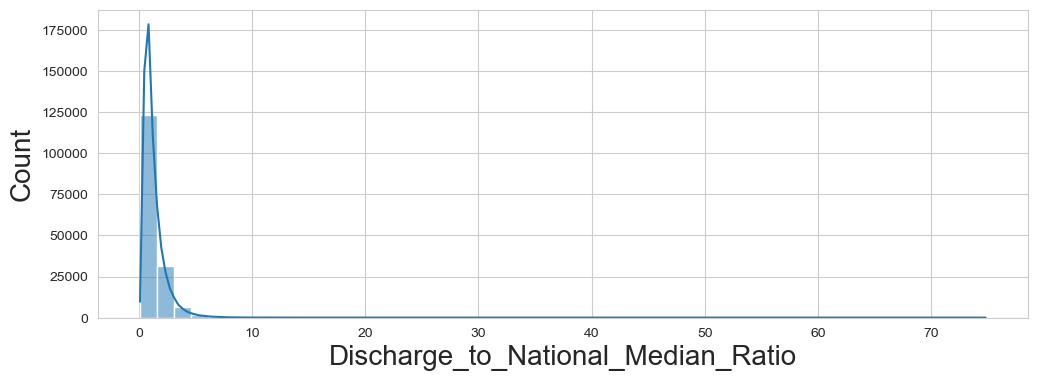

In [112]:
plt.figure(figsize=(12,4))
sns.histplot(df['Discharge_to_National_Median_Ratio'], bins=50, kde=True)
df['Discharge_to_National_Median_Ratio'].describe()

<AxesSubplot:xlabel='Discharge_to_National_Median_Ratio'>

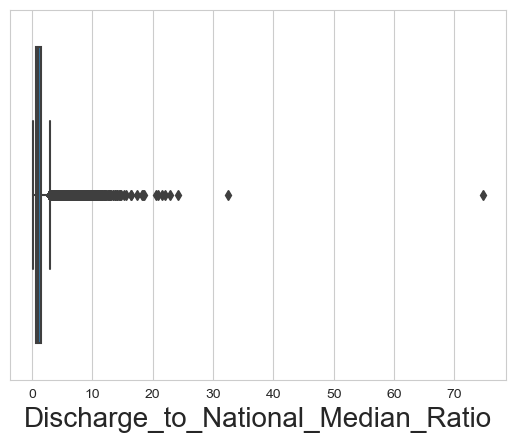

In [113]:
sns.boxplot(df['Discharge_to_National_Median_Ratio'])

**Conclusion**: The wide range of the data, especially the maximum value, suggests that there could be cases of both over and underutilization of services. The extremely high maximum value could warrant further investigation to determine its legitimacy and cause.

#### Feature 2: Providers Ratio of Total Discharge and Average Total Payment

**Lead:** By analyzing the relationship between the volume of patient discharges and the corresponding payments received by providers, this feature helps identify anomalies that may indicate fraudulent billing practices or abusive behavior. Providers with disproportionately high discharge-to-payment ratios could be engaging in activities such as upcoding, where they bill for more services than actually provided, or churning, where patients are discharged prematurely to generate additional revenue.

In [114]:
df['Discharge_to_Payment_Ratio'] =  df['Average_Total_Payments']/df['Total_Discharges']
df['Discharge_to_Payment_Ratio'].describe()

count    163065.000000
mean        406.966086
std         469.364406
min           3.162037
25%         141.221268
50%         271.436250
75%         485.930000
max       14196.198182
Name: Discharge_to_Payment_Ratio, dtype: float64

In [115]:
# Median discharges for each DRG within each State
median_payments = df.groupby(['DRG', 'Provider_State'])['Discharge_to_Payment_Ratio'].median().reset_index()
median_payments.rename(columns={'Discharge_to_Payment_Ratio': 'Median_Payment'}, inplace=True)

# Merge back
df = df.merge(median_payments, on=['DRG', 'Provider_State'])


df['st_Discharge_to_Payment_Ratio'] = df['Discharge_to_Payment_Ratio'] / df['Median_Payment']
df = df.drop('Median_Payment', axis=1)

In [116]:
df['st_Discharge_to_Payment_Ratio'].describe()

count    163065.000000
mean          1.190795
std           0.856414
min           0.016142
25%           0.656856
50%           1.000000
75%           1.466556
max          21.961239
Name: st_Discharge_to_Payment_Ratio, dtype: float64

Text(0.5, 0, 'Provide Ratio of # of Discharge/Total_Payment ')

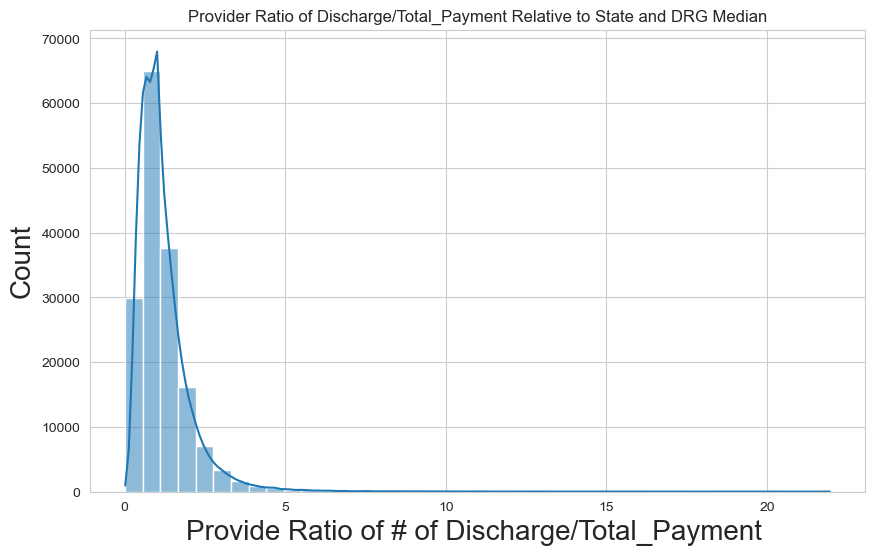

In [117]:
plt.figure(figsize=(10,6))
sns.histplot(df['st_Discharge_to_Payment_Ratio'],kde= True, bins = 40)
plt.title("Provider Ratio of Discharge/Total_Payment Relative to State and DRG Median")
plt.xlabel('Provide Ratio of # of Discharge/Total_Payment ')


**Conclusion:** By examining the Discharge-to-Payment Ratio within each State and Diagnosis-Related Group (DRG), we gain valuable insights into the variation of provider efficiency across different geographical regions and medical conditions. The normalization of the Discharge-to-Payment Ratio by the median ratio within each State and DRG enables us to assess provider performance relative to the typical efficiency observed in their specific context. Providers with st_Discharge_to_Payment_Ratio values significantly higher than 1 may be considered less efficient than their counterparts within the same State and DRG, indicating potential abuse in resource


#### Feature 3:  Efficency (total payment vs. covered charge)
**Lead:** By comparing the total payment received by healthcare providers to the covered charges they submit, this feature highlights discrepancies that may indicate fraudulent billing practices or abusive billing patterns. Providers exhibiting unusually high payment-to-charge ratios may warrant further scrutiny to investigate potential instances of overbilling, upcoding, or other fraudulent activities

In [118]:
df['Cost_Efficiency']= df['Average_Total_Payments'] / df['Average_Covered_Charges']

In [119]:
df['Cost_Efficiency'].describe()

count    163065.000000
mean          0.334889
std           0.177397
min           0.042346
25%           0.215690
50%           0.297683
75%           0.403780
max           5.207929
Name: Cost_Efficiency, dtype: float64

Text(0.5, 0, 'Total_Payment/Covered_Charges')

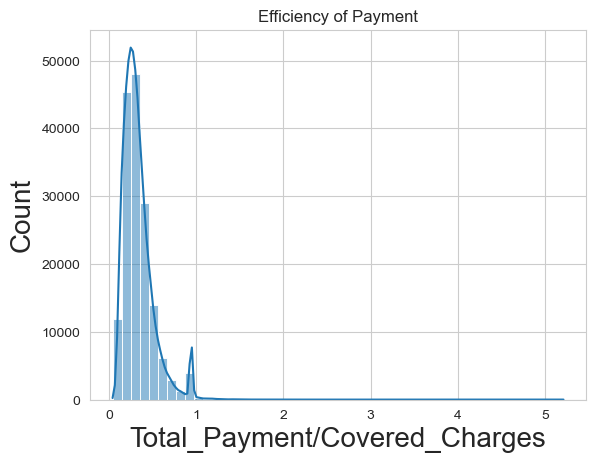

In [120]:
sns.histplot(df['Cost_Efficiency'], bins=50, kde = True)
plt.title('Efficiency of Payment')
plt.xlabel('Total_Payment/Covered_Charges')

**Conclusion:** This feature compares providers' Average Total Payments to their Average Covered Charges. While some providers demonstrate high efficiency ratios, suggesting cost-effective care delivery, others exhibit unusually low ratios, which may indicate overcharging or billing discrepancies. These findings underscore the importance of vigilance in monitoring billing practices to ensure transparency.

#### Feature 4: Patient Payment
**Lead:** This feature look at patients are responsible for after deducting the Average Medicare Payment. This feature offers crucial insights into the financial burden carried by patients in healthcare transactions. By quantifying the share of payments not covered by Medicare, this feature enables us to identify providers where out-of-pocket expenses may be disproportionately high.

In [121]:
df['Patient_Pay_Ratio'] = (df['Average_Total_Payments'] - df['Average_Medicare_Payment']) / df['Average_Total_Payments']

count    163065.000000
mean          0.153455
std           0.087911
min           0.000000
25%           0.086496
50%           0.139811
75%           0.203366
max           0.956845
Name: Patient_Pay_Ratio, dtype: float64

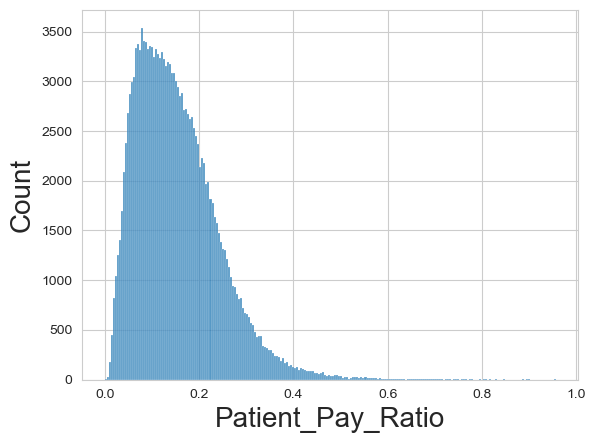

In [122]:
sns.histplot(df['Patient_Pay_Ratio'])
df['Patient_Pay_Ratio'].describe()


In [123]:
# Median discharges for each DRG within each State
median_payments = df.groupby(['DRG', 'Provider_State'])['Patient_Pay_Ratio'].median().reset_index()
median_payments.rename(columns={'Patient_Pay_Ratio': 'Median_Payment'}, inplace=True)

# Merge back
df = df.merge(median_payments, on=['DRG', 'Provider_State'])


df['st_Patient_Pay_Ratio'] = df['Patient_Pay_Ratio'] / df['Median_Payment']
df = df.drop('Median_Payment', axis=1)

In [124]:
df['st_Patient_Pay_Ratio'].describe()

count    163065.000000
mean          1.137393
std           0.665172
min           0.000000
25%           0.821175
50%           1.000000
75%           1.241161
max          19.385306
Name: st_Patient_Pay_Ratio, dtype: float64

Text(0.5, 0, 'Ratio of Patient Payment ')

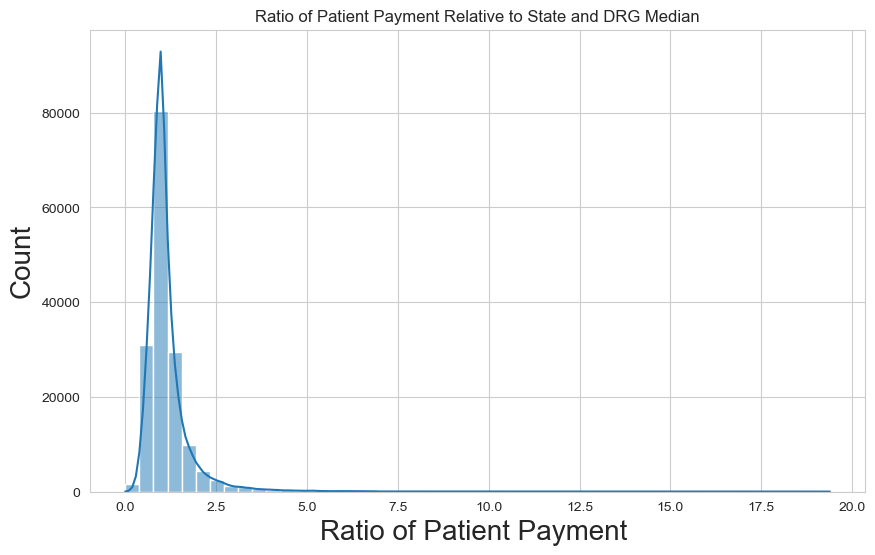

In [125]:
plt.figure(figsize=(10,6))
sns.histplot(df['st_Patient_Pay_Ratio'], kde= True, bins=50)
plt.title("Ratio of Patient Payment Relative to State and DRG Median")
plt.xlabel('Ratio of Patient Payment ')

**Conclusion**: Analyzing the Patient Pay Ratio within each State and (DRG) provides valuable insights into the financial burden shouldered by patients across different geographic regions and medical conditions. By normalizing the Patient Pay Ratio with respect to the median ratio within each State and DRG, we obtain a standardized measure, st_Patient_Pay_Ratio, which facilitates the comparison of patient payment burdens relative to typical expectations within specific contexts.Providers with st_Patient_Pay_Ratio values significantly higher than 1 may indicate instances where patients bear a heavier financial burden compared to the norm, 



In [128]:
df.to_csv('inpatient data with features.csv', encoding='utf-8')

In [129]:
def return_df (df):
    return df


In [131]:
a=return_df(df)
print(a)

                                                     DRG Provider_Id  \
0               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10001   
1               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10055   
2               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10005   
3               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10006   
4               039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       10011   
...                                                  ...         ...   
163060  918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC      380090   
163061  918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC      380102   
163062  918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC      430016   
163063  918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC      430027   
163064  918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC      430077   

                                            Provider_Name  \
0                        SOUTHEAST ALABAMA MEDICAL CENTER   
1            